# **1.1 Business Motivation and Problem Framing :**

In a competitive market, customer retention is a core driver of profitability for banks. Customer churn — the loss of clients to competitors—directly impacts revenue, customer lifetime value, and brand reputation. Proactively identifying customers at risk of leaving is therefore a critical business objective. By understanding the key behaviors to churn, a bank can develop targeted retention strategies, from offering personalized incentives to improving customer service, thereby enhancing overall customer satisfaction and loyalty.

# **1.2 Objectives:**

- Understand key drivers of credit card abandonment

- Engineer features that capture behavioral and demographic patterns

- Develop and compare multiple classification models

- Prioritize **`recall`** to minimize missed churners

- Recommend actionable insights for targeted retention

# **1.3 Executive Summary:**

In the competitive banking sector, the most effective strategy for sustainable growth is not just acquiring new customers, but retaining existing ones. Customer attrition, or churn, directly impacts revenue and erodes long-term profitability. This project addresses this challenge by developing a robust machine learning framework to proactively identify credit card customers who are at a high risk of closing their accounts.

This analysis utilizes a comprehensive bank customer dataset, beginning with rigorous data preprocessing and exploratory data analysis (EDA) to uncover the key drivers of churn. A significant challenge identified was a severe class imbalance, with churned customers representing a small minority. To address this, the Synthetic Minority Over-sampling Technique (**SMOTE**) was integrated into the modeling pipeline, creating a more balanced training environment for our classifiers.

Several machine learning models were developed and tuned. Because the primary business cost comes from failing to identify a customer who is about to leave (**a False Negative**), all models were systematically optimized to maximize **Recall**. The final, tuned model demonstrated excellent performance, achieving a **test accuracy of ______%** and, most importantly, a **Recall of ____%** for the churn class. This high recall indicates that the model is highly effective at its **core objective**: "identifying the vast majority of at-risk customers, enabling the bank to deploy targeted retention strategies and minimize customer loss."

# **1.4 Dataset Column Descriptions:**

**1. CLIENTNUM:** Unique customer identification number assigned by the bank for record tracking.

**2. Attrition_Flag:** Target variable indicating customer status - "Existing Customer" for active users or "Attrited Customer" for those who have discontinued service.

**3. Customer_Age:** Age of the Customer in years. Range: 26-73 years (typical banking age group).

**4. Customer gender:** "M" for male, "F" for female.

**5. Dependent_count:** The number of dependents (family members) that rely on the customer financially. Higher dependents may indicate more stable financial relationships.

**6. Education_Level:** The highest level of education completed by the customer - categories include Uneducated, High School, College, Graduate, Post-Graduate, Doctorate, and Unknown.

**7. Marital_Status:** The current marital status of the customer, which can affect spending patterns and financial stability.

**8. Income_Category:** Annual income brackets ranging from "Less than 40K" to "120K+" with Unknown category for missing data. Higher income customers typically have lower churn rates due to better financial stability.

**9. Card_Category:** The type of credit card held by the customer - Blue (basic), Silver, Gold, or Platinum (premium) with varying benefits and credit limits.

**10. Months_on_book:** Duration of customer relationship with bank measured in months (13-56 months range). Longer tenure typically indicates greater loyalty and lower churn probability.

**11. Total_Relationship_Count:** The total number of products/services the customer has with the bank. Higher relationship counts typically indicate lower churn risk due to deeper banking relationships.

**12. Months_Inactive_12_mon:** The number of months the customer was inactive in the last 12 months. ***Key churn indicator*** -- customers with more inactive months show significantly higher churn rates.

**13. Contacts_Count_12_mon:** The number of times the customer contacted the bank's customer service in the last 12 months. *Often higher for at-risk customers*.

**14. Credit_Limit:** Credit limit assigned to the customer’s card. While a high credit limit often reflects a customer’s value to the business, leaving that limit unused may also be an early warning sign of potential churn.

**15. Total_Revolving_Bal:** The total amount of revolving balance (unpaid balance that carries over month to month) on the customer's credit card.

**16. Avg_Open_To_Buy:** The average available credit (Credit Limit - Current Balance) over the past 12 months. This indicates how much purchasing power the customer has remaining.

**17. Total_Amt_Chng_Q4_Q1:** The percentage change in transaction amount from Q4 (previous year) to Q1 (current year).

**18. Total_Trans_Amt:** Total transaction amount in the last 12 months. ***Highly correlated with churn*** - customers with higher transaction amounts are much less likely to churn.

**19. Total_Trans_Ct:** The total number of transactions in the last 12 months. ***Strongest predictor of churn.***

**20. Total_Ct_Chng_Q4_Q1:** The percentage change in transaction count from Q4 to Q1. Shows whether customer activity is increasing or decreasing, which is crucial for predicting churn.

**21. Avg_Utilization_Ratio:** The average utilization ratio of the credit card. Very high utilization may indicate financial stress.

#  **2. Data Overview**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
file_path='BankChurners.csv'
df=pd.read_csv(file_path)

In [ ]:
df.sample(5)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
7584  778849908  Existing Customer            59      F                1   
5883  769577358  Existing Customer            31      F                0   
992   714940608  Existing Customer            36      M                2   
7296  828294933  Attrited Customer            49      F                3   
1007  714244383  Existing Customer            39      M                3   

     Education_Level Marital_Status Income_Category Card_Category  \
7584       Doctorate        Married  Less than $40K          Blue   
5883        Graduate         Single  Less than $40K          Blue   
992      High School       Divorced     $40K - $60K          Blue   
7296     High School        Married  Less than $40K          Blue   
1007         College        Unknown    $80K - $120K          Blue   

      Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
7584              40  ...                       3                      1   
5883              17  ...                       2                      3   
992               36  ...                       3                      2   
7296              45  ...                       2                      3   
1007              36  ...                       2                      3   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
7584        2687.0                 2452            235.0   
5883        2787.0                 1761           1026.0   
992         2686.0                 1733            953.0   
7296        2951.0                 2437            514.0   
1007       33406.0                 1692          31714.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
7584                 0.817             4697              81   
5883                 0.670             4358              89   
992                  0.706             2057              53   
7296                 0.765             2519              36   
1007                 1.242             1529              30   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
7584                0.761                  0.913  
5883                0.648                  0.632  
992                 0.710                  0.645  
7296                0.565                  0.826  
1007                0.875                  0.051  

[5 rows x 21 columns]

In [ ]:
df.shape

(10127, 21)

In [ ]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### **2.1 Unique values of Category columns**

In [ ]:
df.select_dtypes(include=['object']).nunique()

Attrition_Flag     2
Gender             2
Education_Level    7
Marital_Status     4
Income_Category    6
Card_Category      4
dtype: int64

### **2.2 Unique values of Numerical Columns**


In [ ]:
df.select_dtypes(exclude="object").nunique()

CLIENTNUM                   10127
Customer_Age                   45
Dependent_count                 6
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

*The Age feature displays about 45 unique values, indicating that our customer population is concentrated within a specific age span.*

### **2.3 Categorical feature distributions (unique counts & percentages)**

In [ ]:
# Function to display unique value counts and their percentage distribution for all categorical columns

def show_category_stats(df):
    for cat_cols in (
        df.select_dtypes(exclude=[np.int64, np.float64]).columns.unique().to_list()
    ):
        print(f"Feature: {cat_cols}")
        df_temp = pd.concat(
            [
                df[cat_cols].value_counts(),
                (df[cat_cols].value_counts(normalize=True) * 100).round(1),
            ],
            axis=1,
        )
        df_temp.columns = ["Count", "Percentage"]
        print(df_temp)
        print("=" * 40)

In [ ]:
show_category_stats(df)

Feature: Attrition_Flag
                   Count  Percentage
Attrition_Flag                      
Existing Customer   8500        83.9
Attrited Customer   1627        16.1
Feature: Gender
        Count  Percentage
Gender                   
F        5358        52.9
M        4769        47.1
Feature: Education_Level
                 Count  Percentage
Education_Level                   
Graduate          3128        30.9
High School       2013        19.9
Unknown           1519        15.0
Uneducated        1487        14.7
College           1013        10.0
Post-Graduate      516         5.1
Doctorate          451         4.5
Feature: Marital_Status
                Count  Percentage
Marital_Status                   
Married          4687        46.3
Single           3943        38.9
Unknown           749         7.4
Divorced          748         7.4
Feature: Income_Category
                 Count  Percentage
Income_Category                   
Less than $40K    3561        35.2
$40K - $60

- Target `Attrition_Flag` is **imbalanced**: Existing Customer 83.9% vs Attrited Customer 16.1%.
- `Card_Category` is **highly skewed** : ~93% Blue (Silver 5.5%, Gold/Platinum rare).
- `Income_Category` contains `Unknown` (~11%).
- `Education_Level` has several small groups (Doctorate, Post-Graduate).

# **3. Initial Data Preprocessing - Basic Cleaning**

### **3.1 Duplicates**

In [ ]:
# let's check how many exact duplicate rows (all columns)
df.duplicated().sum()

np.int64(0)

In [ ]:
# duplicate by CLIENTNUM
print(df.shape, df['CLIENTNUM'].nunique())

(10127, 21) 10127


### **3.2 Standardize Feature Names**

In [ ]:
# Remove spaces from column names and replace with underscores
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
# Make column names lowercase
df.columns = df.columns.str.lower()

In [ ]:
df.columns

Index(['clientnum', 'attrition_flag', 'customer_age', 'gender',
       'dependent_count', 'education_level', 'marital_status',
       'income_category', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'],
      dtype='object')

In [ ]:
# dropping customer ID
df.drop(columns=["clientnum"], inplace=True)

### **3.3 Encode attrition_flag variable and rename column**

In [ ]:
df['attrition_flag'] = np.where(
    df['attrition_flag'] == 'Existing Customer',
    0,
    1
  )


df.rename(columns={'attrition_flag': 'churn'}, inplace=True)

In [ ]:
# Verify
print(df['churn'].value_counts())

churn
0    8500
1    1627
Name: count, dtype: int64


### **3.4 Convert 'object' columns to pandas 'category' type**

In [ ]:
# Converted the following object-type columns to 'category' because they have
# limited unique values and benefit from memory and speed improvements

category_columns = df.select_dtypes(include="object").columns.tolist()
df[category_columns] = df[category_columns].astype("category")

In [ ]:
# Verify
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   churn                     10127 non-null  int64   
 1   customer_age              10127 non-null  int64   
 2   gender                    10127 non-null  category
 3   dependent_count           10127 non-null  int64   
 4   education_level           10127 non-null  category
 5   marital_status            10127 non-null  category
 6   income_category           10127 non-null  category
 7   card_category             10127 non-null  category
 8   months_on_book            10127 non-null  int64   
 9   total_relationship_count  10127 non-null  int64   
 10  months_inactive_12_mon    10127 non-null  int64   
 11  contacts_count_12_mon     10127 non-null  int64   
 12  credit_limit              10127 non-null  float64 
 13  total_revolving_bal       10127 non-null  int6

### **3.5 Check for missing values**

In [ ]:
# let's check for missing values in the data
df.isnull().sum()

churn                       0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64

### **3.6 Categorical Features: Unique Value Counts**

In [ ]:
show_category_stats(df)

Feature: gender
        Count  Percentage
gender                   
F        5358        52.9
M        4769        47.1
Feature: education_level
                 Count  Percentage
education_level                   
Graduate          3128        30.9
High School       2013        19.9
Unknown           1519        15.0
Uneducated        1487        14.7
College           1013        10.0
Post-Graduate      516         5.1
Doctorate          451         4.5
Feature: marital_status
                Count  Percentage
marital_status                   
Married          4687        46.3
Single           3943        38.9
Unknown           749         7.4
Divorced          748         7.4
Feature: income_category
                 Count  Percentage
income_category                   
Less than $40K    3561        35.2
$40K - $60K       1790        17.7
$80K - $120K      1535        15.2
$60K - $80K       1402        13.8
Unknown           1112        11.0
$120K +            727         7.2
Feature

- `education_level`: **1519** records (**15.0%** of 10,127) are labeled `"Unknown"`.  
- `marital_status`: **749** records (**7.4%**) are labeled `"Unknown"`.  
- `income_category`: **1112** records (**11.0%**) are labeled `"Unknown"`.

*These are non-trivial proportions, so dropping those rows would discard substantial information.*

### **3.7 Convert "Unknown" to explicit "Missing" category**

- Keep the dataset’s natural distribution intact instead of artificially boosting a category.

- Keep missingness visible so the model can learn from the absence of a value.

- Prevent bias that comes from filling blanks with the most common label.

In [ ]:
def replace_Unknown_by_Missing(df):
    """
    Replace 'Unknown' with 'Missing' for categorical features
    """

    categorical_missing_cols = ['education_level', 'marital_status', 'income_category']

    print("Replace 'Unknown' with 'Missing' for categorical features:")
    for col in categorical_missing_cols:
        unknown_count = (df[col] == 'Unknown').sum()
        df[col] = df[col].replace('Unknown', 'Missing')
        print(f" {col}: {unknown_count} 'Unknown' --> 'Missing'")

    return df

# Apply the transformation
df = replace_Unknown_by_Missing(df)

Replace 'Unknown' with 'Missing' for categorical features:
 education_level: 1519 'Unknown' --> 'Missing'
 marital_status: 749 'Unknown' --> 'Missing'
 income_category: 1112 'Unknown' --> 'Missing'


In [ ]:
#Verify
show_category_stats(df)

Feature: gender
        Count  Percentage
gender                   
F        5358        52.9
M        4769        47.1
Feature: education_level
                 Count  Percentage
education_level                   
Graduate          3128        30.9
High School       2013        19.9
Missing           1519        15.0
Uneducated        1487        14.7
College           1013        10.0
Post-Graduate      516         5.1
Doctorate          451         4.5
Feature: marital_status
                Count  Percentage
marital_status                   
Married          4687        46.3
Single           3943        38.9
Missing           749         7.4
Divorced          748         7.4
Feature: income_category
                 Count  Percentage
income_category                   
Less than $40K    3561        35.2
$40K - $60K       1790        17.7
$80K - $120K      1535        15.2
$60K - $80K       1402        13.8
Missing           1112        11.0
$120K +            727         7.2
Feature

*So All* `"Unknown"` *values have been successfully replaced with* `"Missing"`

# **4. Exploratory Data Analysis (EDA)**

### **4.1 Basis statistics**

In [ ]:
df.describe()

churn  customer_age  dependent_count  months_on_book  \
count  10127.000000  10127.000000     10127.000000    10127.000000   
mean       0.160660     46.325960         2.346203       35.928409   
std        0.367235      8.016814         1.298908        7.986416   
min        0.000000     26.000000         0.000000       13.000000   
25%        0.000000     41.000000         1.000000       31.000000   
50%        0.000000     46.000000         2.000000       36.000000   
75%        0.000000     52.000000         3.000000       40.000000   
max        1.000000     73.000000         5.000000       56.000000   

       total_relationship_count  months_inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       contacts_count_12_mon  credit_limit  total_revolving_bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       avg_open_to_buy  total_amt_chng_q4_q1  total_trans_amt  total_trans_ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       total_ct_chng_q4_q1  avg_utilization_ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

### **4.2 Quick overview**

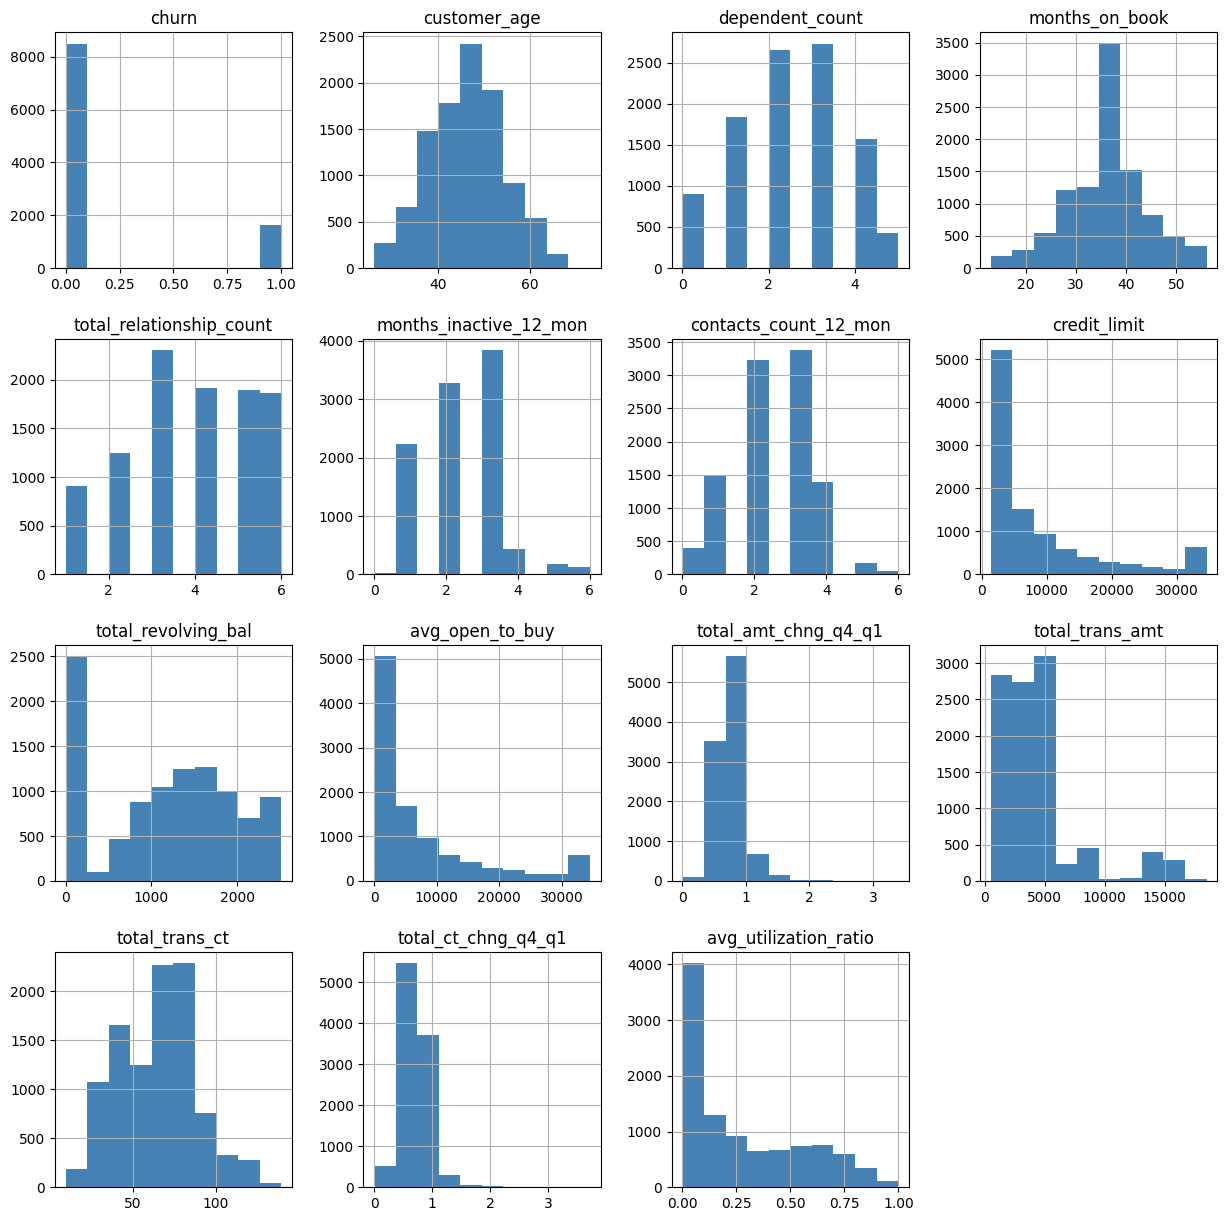

In [ ]:
df.hist(figsize=(15,15), color='steelblue')
plt.show()

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

sns.pairplot(df[numerical_cols])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## **4.2 Univariate Analysis**

 ## **4.2.1 Numeric Feature Analysis**

To understand each numerical attribute individually, we will visualize its distribution. The following function is designed to plot a `histogram` and a `box plot` for any given feature. It also prints a 5-point summary (minimum, first quartile, median, third quartile, and maximum) to provide a precise statistical overview.

In [ ]:
def plot_numerical (df, col):
    """
    Prints 5-point summary and plots histogram (with mean/median lines) and boxplot for a numerical feature.

    Parameters:
        df: pandas DataFrame
        col: feature (column) name as string
    """
    # Calculate 5-point summary
    x_min = df[col].min()
    x_max = df[col].max()
    Q1 = df[col].quantile(0.25)
    Q2 = df[col].quantile(0.50)
    Q3 = df[col].quantile(0.75)

    summary_dict = {"Min": x_min, "Q1": Q1, "Q2": Q2, "Q3": Q3, "Max": x_max}
    summary_df = pd.DataFrame(data=summary_dict, index=["Value"])

    print(f"5 Point Summary of {col} Column:\n")
    print(summary_df)


    #Skewness of the numeric variables
    print(f'\nSkewness of {col}: {df[col].skew()}')


    # Plotting
    plt.figure(figsize=(11, 4))
    sns.set_palette("Pastel1")

    # Histogram with KDE, mean, and median lines
    plt.subplot(1, 2, 1)
    ax1 = sns.histplot(df[col], kde=True, color="purple")
    ax1.axvline(np.mean(df[col]), color="purple", linestyle="--", label="Mean")
    ax1.axvline(np.median(df[col]), color="black", linestyle="-", label="Median")
    plt.legend()
    plt.title(f"{col} Density Distribution")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color="lightblue", showmeans=True)
    plt.title(f"{col} Boxplot")

    plt.tight_layout()
    plt.show()

5 Point Summary of customer_age Column:

       Min    Q1    Q2    Q3  Max
Value   26  41.0  46.0  52.0   73

Skewness of customer_age: -0.033605016317173456


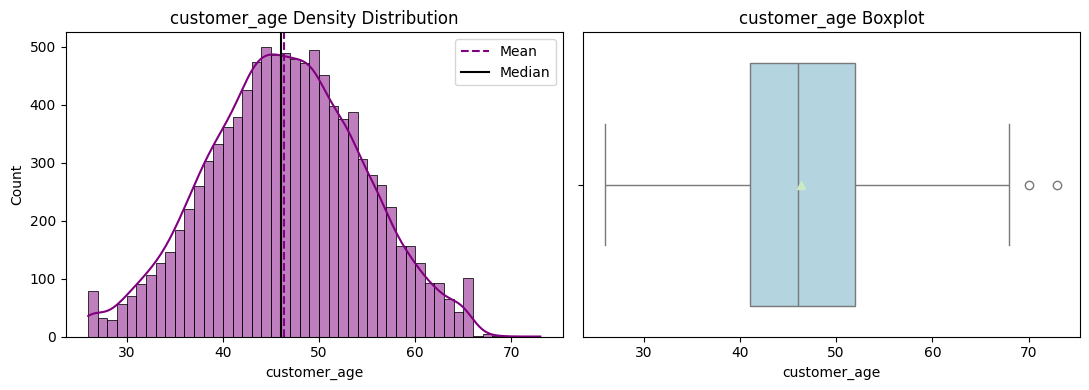

In [ ]:
plot_numerical(df, "customer_age")

- `customer_age` follows a near-normal distribution, with just two high-end outliers.

5 Point Summary of dependent_count Column:

       Min   Q1   Q2   Q3  Max
Value    0  1.0  2.0  3.0    5

Skewness of dependent_count: -0.020825535616339912


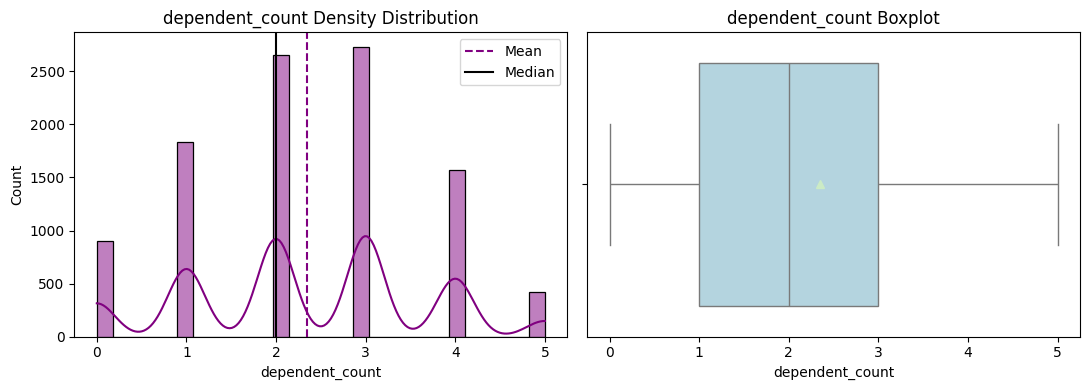

In [ ]:
plot_numerical(df, "dependent_count")

- The majority of customers have a `dependent_count` of either 2 or 3, indicating that most individuals financially support two to three dependents.

5 Point Summary of months_on_book Column:

       Min    Q1    Q2    Q3  Max
Value   13  31.0  36.0  40.0   56

Skewness of months_on_book: -0.10656535989402989


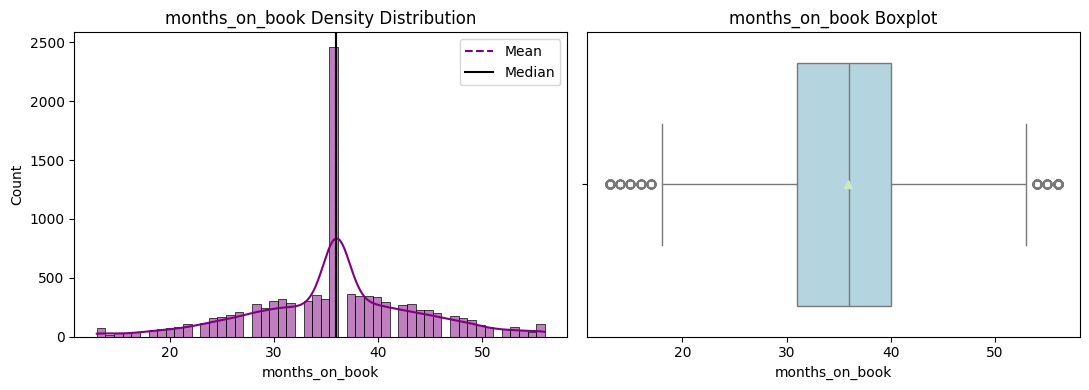

In [ ]:
plot_numerical(df, "months_on_book")

- The histogram for `months_on_book` shows a roughly normal pattern but with an peak near 35 months.
- There are outliers present at both the lower and upper extremes of the range.

5 Point Summary of total_relationship_count Column:

       Min   Q1   Q2   Q3  Max
Value    1  3.0  4.0  5.0    6

Skewness of total_relationship_count: -0.16245241498173682


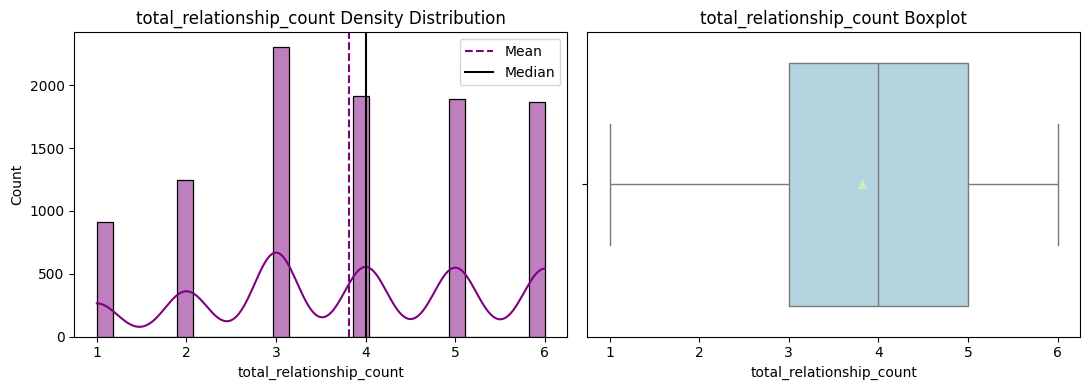

In [ ]:
plot_numerical(df, "total_relationship_count")

- Most customers maintain a strong connection with the bank, having 4 or more active relationships, reflecting deep engagement with multiple products or services.

5 Point Summary of months_inactive_12_mon Column:

       Min   Q1   Q2   Q3  Max
Value    0  2.0  2.0  3.0    6

Skewness of months_inactive_12_mon: 0.6330611289713137


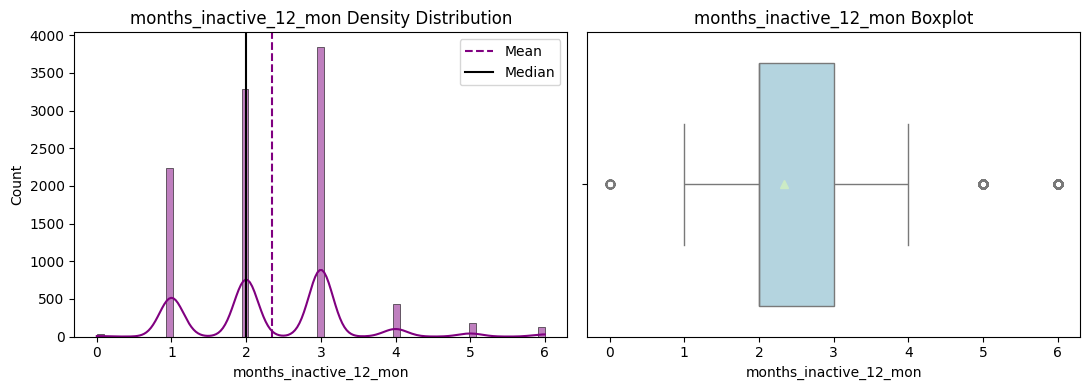

In [ ]:
plot_numerical(df, "months_inactive_12_mon")

- The key takeaway from the `months_inactive_12_mon` data is the identification of at-risk customers. While inactivity of 0 months is a positive sign of engagement, an inactivity period of 5 or more months should be flagged as a strong indicator of potential attrition.

5 Point Summary of contacts_count_12_mon Column:

       Min   Q1   Q2   Q3  Max
Value    0  2.0  2.0  3.0    6

Skewness of contacts_count_12_mon: 0.011005626218976492


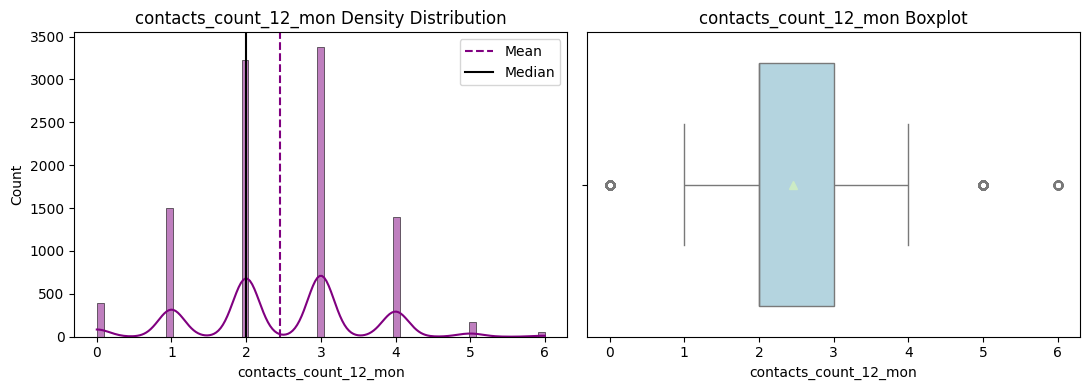

In [ ]:
plot_numerical(df, "contacts_count_12_mon")

- Once again, we observe outliers on both the high and low sides for `contacts_count_12_mon`.
-This raises a key question for the next stage of analysis: does a significantly infrequent number of contacts correlate with a higher probability of churn? This is a critical area to explore.

5 Point Summary of credit_limit Column:

          Min      Q1      Q2       Q3      Max
Value  1438.3  2555.0  4549.0  11067.5  34516.0

Skewness of credit_limit: 1.666725807993647


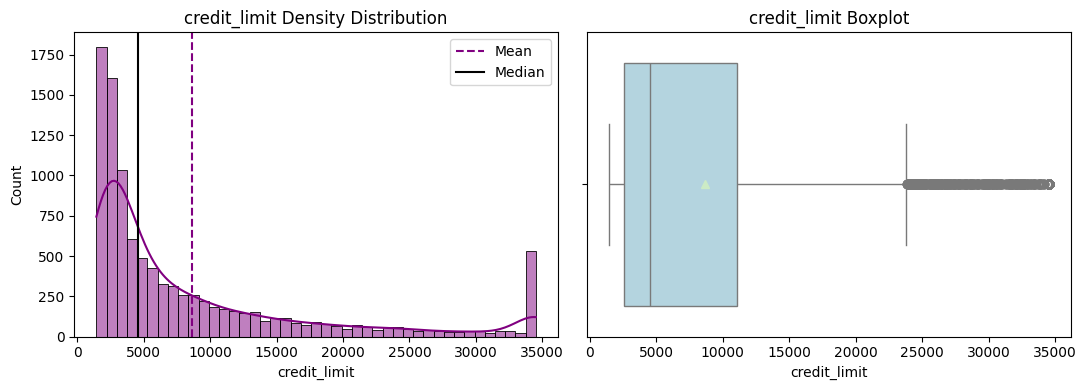

In [ ]:
plot_numerical(df, "credit_limit")

- The upper-end outliers observed in the `credit_limit` data can be logically explained by the existence of a high-value customer segment that is granted greater credit access.

5 Point Summary of total_revolving_bal Column:

       Min     Q1      Q2      Q3   Max
Value    0  359.0  1276.0  1784.0  2517

Skewness of total_revolving_bal: -0.14883725028007228


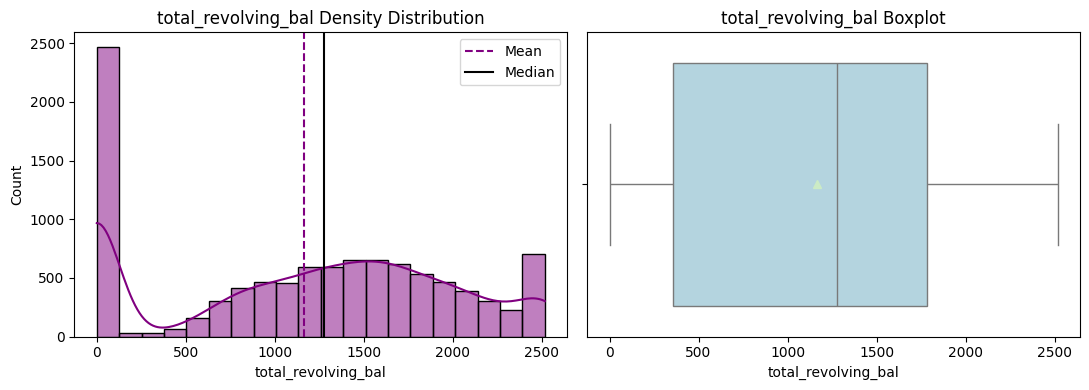

In [ ]:
plot_numerical(df, "total_revolving_bal")

- The `total_revolving_balance` shows two distinct customer types: a large group with a zero balance and another major group that consistently carries a significant revolving debt

5 Point Summary of avg_open_to_buy Column:

       Min      Q1      Q2      Q3      Max
Value  3.0  1324.5  3474.0  9859.0  34516.0

Skewness of avg_open_to_buy: 1.6616965459311595


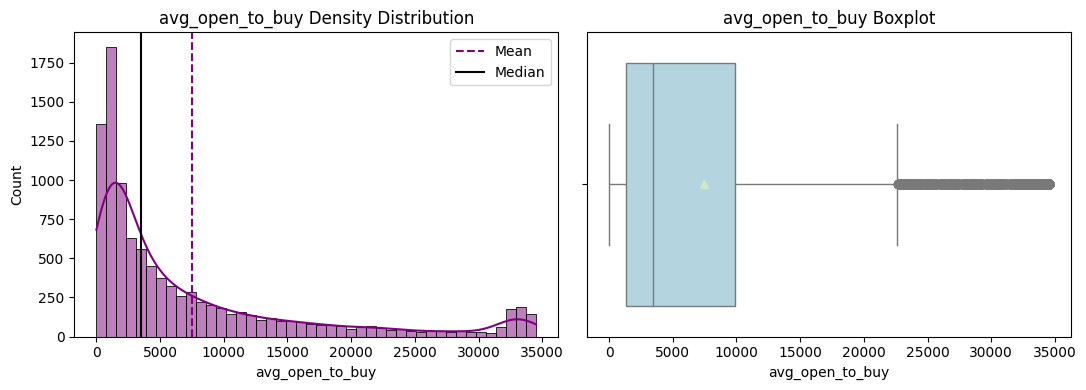

In [ ]:
plot_numerical(df, "avg_open_to_buy")

- The `avg_open_to_buy` feature exhibits a right-skewed distribution
- It has lots of higher end outliers, which means most customers maintain high `avg_open_to_buy` values, indicating they use only a small portion of their available credit.

5 Point Summary of total_amt_chng_q4_q1 Column:

       Min     Q1     Q2     Q3    Max
Value  0.0  0.631  0.736  0.859  3.397

Skewness of total_amt_chng_q4_q1: 1.7320634114286038


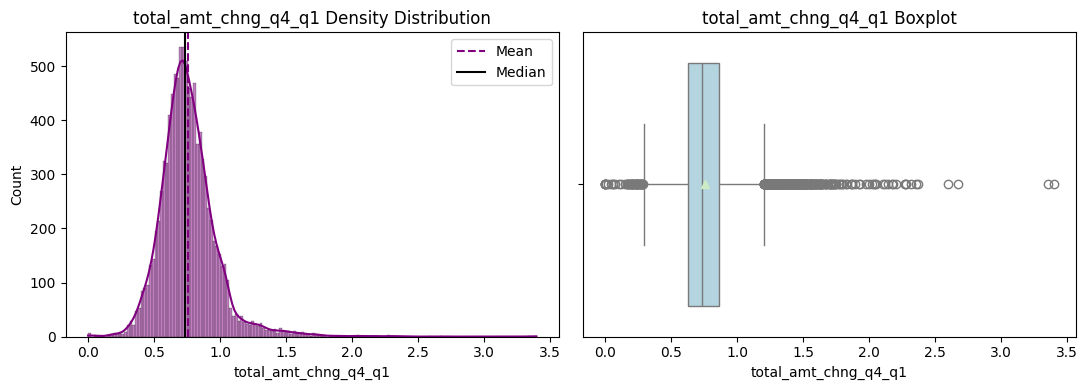

In [ ]:
plot_numerical(df, "total_amt_chng_q4_q1")

- The `total_amt_chng_q4_q1` data is extremely right-skewed, showing that most customers' spending habits are stable.
- High-End Outliers Present: A small subset of customers experienced dramatic transaction increases.

5 Point Summary of total_trans_amt Column:

       Min      Q1      Q2      Q3    Max
Value  510  2155.5  3899.0  4741.0  18484

Skewness of total_trans_amt: 2.0410034025756936


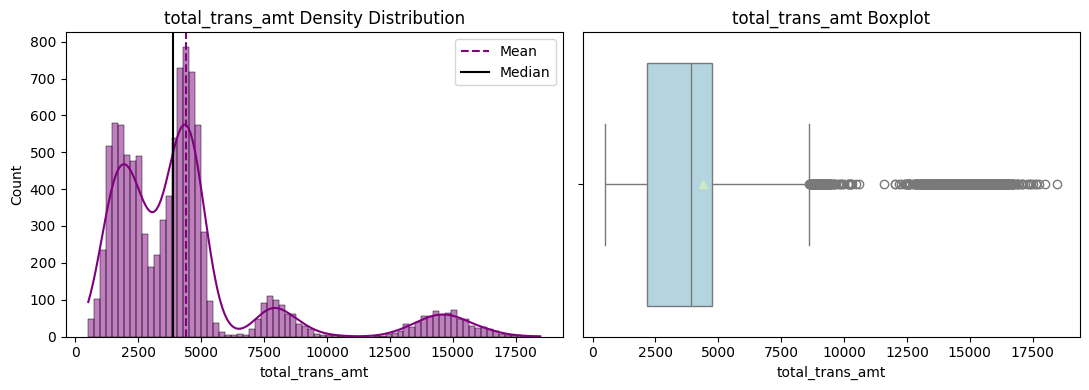

In [ ]:
plot_numerical(df, "total_trans_amt")

- The feature shows **heavy right-skewness** with most customers having transaction amounts below \$4000, while the median (\$3899) is significantly lower than outliers reaching \$18,484
- There are notable **high-end outliers**, indicating a small group of customers who spend or transact significantly more than the majority.

5 Point Summary of total_trans_ct Column:

       Min    Q1    Q2    Q3  Max
Value   10  45.0  67.0  81.0  139

Skewness of total_trans_ct: 0.15367306849872275


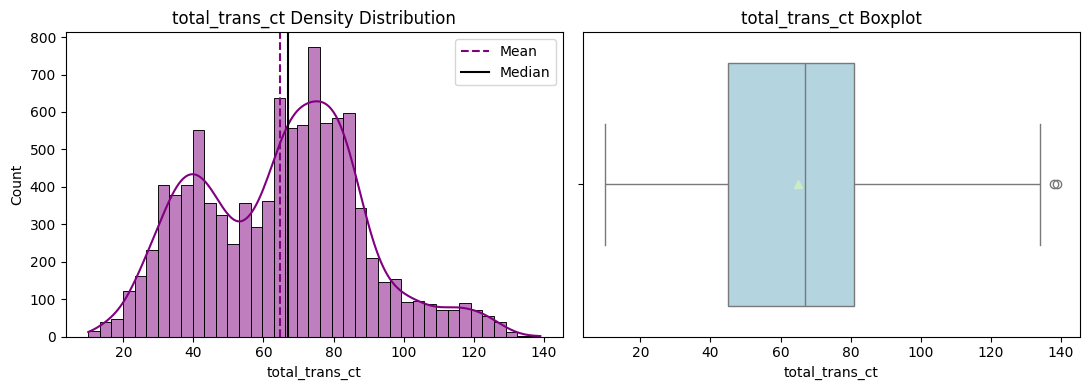

In [ ]:
plot_numerical(df, "total_trans_ct")

- `total_trans_ct` is **bimodal**: The feature shows two distinct peaks around 45 and 80 transactions, indicating two different customer transaction frequency patterns.

- **Right-Skewed with Outliers**: Most customers have transaction counts below 100, with some outliers reaching up to 139 transactions, suggesting a small segment of highly active customers.

5 Point Summary of total_ct_chng_q4_q1 Column:

       Min     Q1     Q2     Q3    Max
Value  0.0  0.582  0.702  0.818  3.714

Skewness of total_ct_chng_q4_q1: 2.0640305679077477


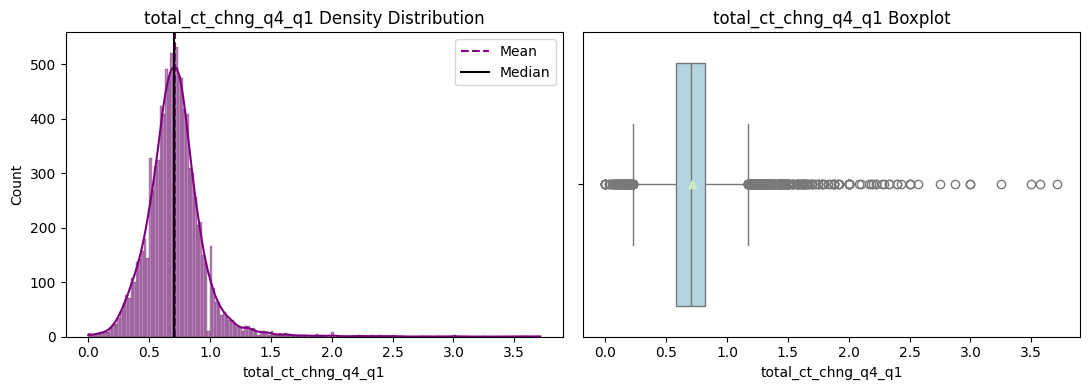

In [ ]:
plot_numerical(df, "total_ct_chng_q4_q1")

- **Right-skewed distribution**: Most customers show minimal change in transaction count between Q4-Q1, with majority clustered around 0.7-0.8 range.

- **Outliers present**: A few customers experienced significant increases in transaction frequency, with some reaching up to 3.7x change.

5 Point Summary of avg_utilization_ratio Column:

       Min     Q1     Q2     Q3    Max
Value  0.0  0.023  0.176  0.503  0.999

Skewness of avg_utilization_ratio: 0.7180079967731994


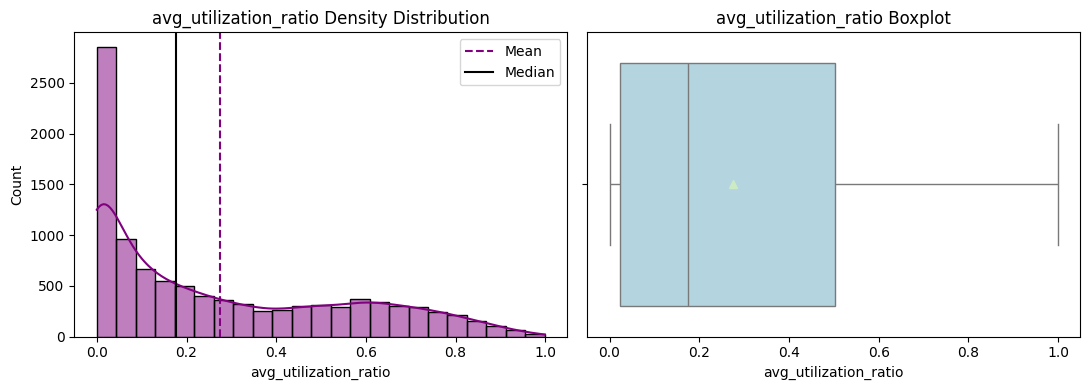

In [ ]:
plot_numerical(df, "avg_utilization_ratio")

- **Heavy right-skew:** The distribution is right-skewed, with most customers using a low proportion of their available credit.
- A minority of customers have high utilization ratios.

## **4.2.2 Categorical Feature Analysis**

### Now, let’s create visual summaries for our categorical features. Below is code that generates `pie charts` and `bar plots` to explore distributions across the following fields: `attrition_flag`, `gender`, `education_level`, `marital_status`, `income_category`, and `card_category`.

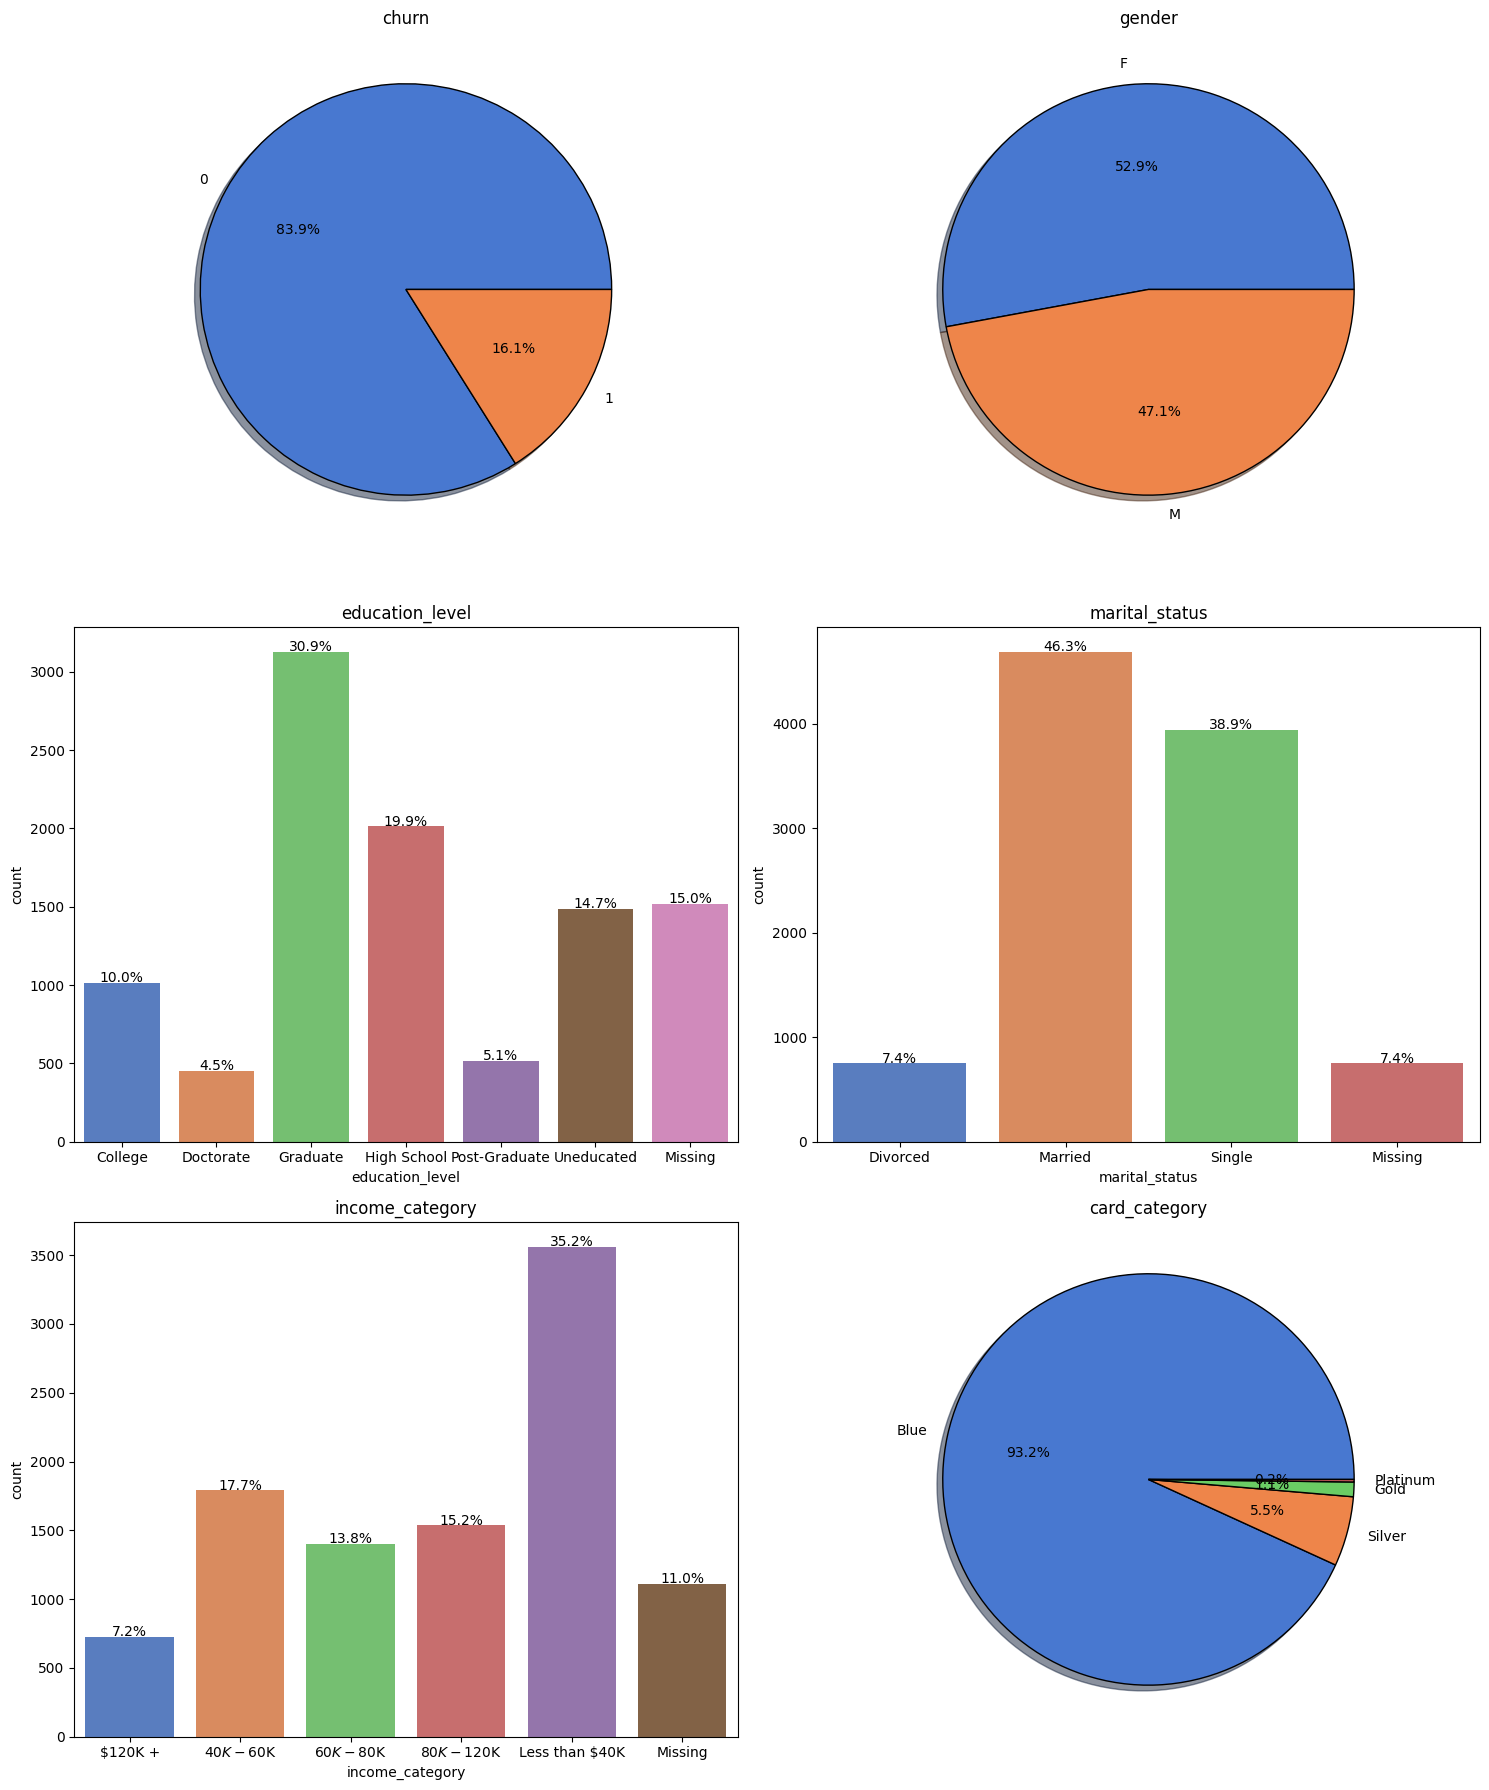

In [ ]:
plt.figure(figsize=(15, 18))

# Color settings
colors = sns.color_palette("muted")

# Subplot 1: churn pie chart
plt.subplot(3, 2, 1)
labels = df['churn'].value_counts().keys()
data = df['churn'].value_counts()
plt.pie(data, labels=labels, autopct='%.1f%%',
        shadow=True, wedgeprops={'edgecolor': 'black'},
        colors=colors[:len(data)])
plt.title('churn')

# Subplot 2: gender pie chart
plt.subplot(3, 2, 2)
labels = df['gender'].value_counts().keys()
data = df['gender'].value_counts()
plt.pie(data, labels=labels, autopct='%.1f%%',
        shadow=True, wedgeprops={'edgecolor': 'black'},
        colors=colors[:len(data)])
plt.title('gender')

# Subplot 3: education_level bar chart with percentage labels
plt.subplot(3, 2, 3)
ax = sns.countplot(x=df['education_level'], palette=colors)
plt.title('education_level')
#percentage calcutate
total = len(df['education_level'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 4,  #Text(percentage) is centered horizontally on the bar
            f'{100 * height / total:.1f}%', ha='center')

# Subplot 4: marital_status bar chart with percentage labels
plt.subplot(3, 2, 4)
ax = sns.countplot(x=df['marital_status'], palette=colors)
plt.title('marital_status')
total = len(df['marital_status'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 4,
            f'{100 * height / total:.1f}%', ha='center')

# Subplot 5: income_category bar chart with percentage labels
plt.subplot(3, 2, 5)
ax = sns.countplot(x=df['income_category'], palette=colors)
plt.title('income_category')
total = len(df['income_category'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 4,
            f'{100 * height / total:.1f}%', ha='center')

# Subplot 6: card_category pie chart
plt.subplot(3, 2, 6)
labels = df['card_category'].value_counts().keys()
data = df['card_category'].value_counts()
plt.pie(data, labels=labels, autopct='%.1f%%',
        shadow=True, wedgeprops={'edgecolor': 'black'},
        colors=colors[:len(data)])
plt.title('card_category')

plt.tight_layout()
plt.show()

- **`churn`:**  The dataset is highly imbalanced: existing customers comprise ≈84%, making churn a rare event that requires imbalance-aware modeling.
- **`gender`:** Gender split is nearly even with a slight female tilt (~53% female).
- **`education_level`:** Graduates make up roughly 31% of the customer base, reflecting a well-educated demographic.
- **marital_status**: Married and Single together represent the vast majority (~85%), with Married ≈46.3%.
- **`income_category`:** Income is polarized — ~35% earn < \$40k while ~36% earn ≥ \$60k, suggesting two core segments.
- **`card_category`:** Blue card overwhelmingly dominates (~93%), so card-type alone gives limited discrimination.

# **4.3 Bivariate Analysis**

## **4.3.1 Numerical Features vs. Churn Status**

- Analyzing the Distribution of Numerical Variables Based on `Churn` Status

**Plots:** `churn` plotted against Numerical columns:

In [ ]:
def plot_numerical_vs_target(df, numerical_cols, target_col='churn'):
    """
    For each column in numerical_cols, plot side-by-side:
      - A boxplot (Without Outliers) & a barplot.

    Parameters:
    - df: pandas DataFrame.
    - numerical_cols: A list of the names of the numerical columns.
    - target_col: The name of the target variable.
    """

    # Determine the number of rows needed
    num_rows = len(numerical_cols)

    # Create the figure and axes grid
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(20, 8 * num_rows))

    # Set context to 'talk' for larger default font sizes
    sns.set_context("talk")

    # Loop through each numerical column and its corresponding axes row
    for i, col in enumerate(numerical_cols):
        # --- Box Plot ---
        ax1 = axes[i, 0]
        sns.boxplot(
            data=df,
            x=target_col,
            y=col,
            palette="muted",
            showfliers=False,  # Hide outliers
            ax=ax1
        )
        ax1.set_title(f'{col} vs {target_col}. (Without Outliers)')
        ax1.set_xlabel(target_col)
        ax1.set_ylabel(col)

        # --- Bar Plot (showing the mean) ---
        ax2 = axes[i, 1]
        sns.barplot(
            data=df,
            x=target_col,
            y=col,
            palette="pastel",
            ax=ax2
        )
        ax2.set_title(f'{col} vs {target_col}')
        ax2.set_xlabel(target_col)
        ax2.set_ylabel(col)

    # Add a main title for the entire figure

    fig.suptitle(f'Numerical Features vs. {target_col}', y=1)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

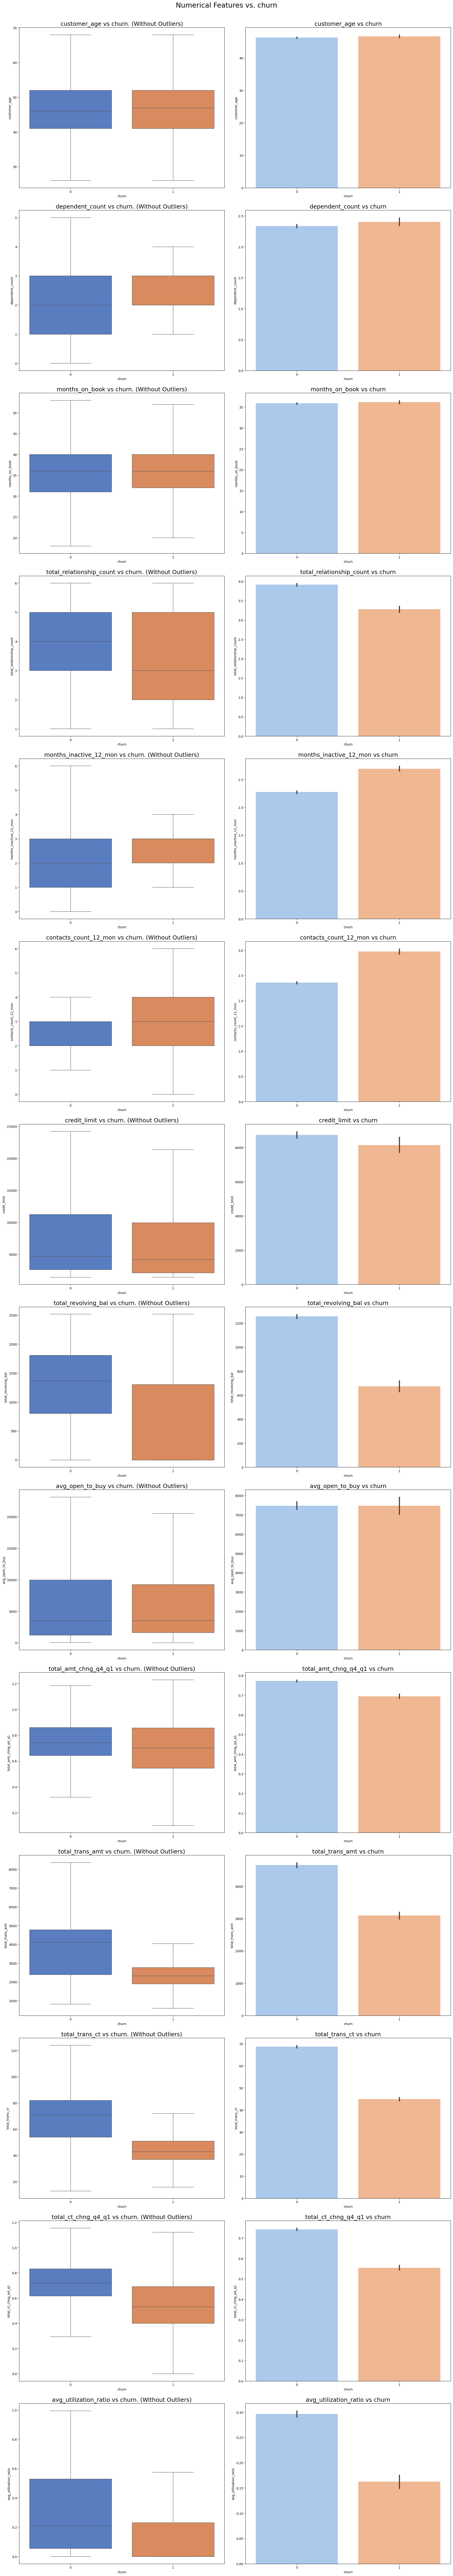

In [ ]:
numerical_columns = df.select_dtypes(exclude="category").columns.tolist()
numerical_columns.remove('churn') #Remove 'churn' from the list
plot_numerical_vs_target(df, numerical_columns)

*Observation:*
- `total_trans_ct`: **Lower** for churned customers.
- `total_trans_amt`: **Lower** for churned customers.
- `total_ct_chng_q4_q1`: **Lower** for churned customers.
- `total_amt_chng_q4_q1`: **lower** for churned customers
- `total_revolving_bal`: **Lower** for churned customers.
- `avg_utilization_ratio`: **Lower** for churned customers.
- `total_relationship_count`: **Lower** for churned customers.
- `contacts_count_12_mon`: **Higher** for churned customers.
- `months_inactive_12_mon`: **Higher** for churned customers.

## **4.3.2 Categorical Features vs. Churn Status**



- Analyzing the Distribution of Categorical Variables Based on `Churn` Status

**Plots:** `churn` plotted against categorical columns: `gender`, `education_level`, `marital_status	`, `income_category` and `card_category	`.

In [ ]:
def plot_categorical_vs_target(df, cat_cols, target_col='churn'):
    """
    For each column in cat_cols, plot side-by-side:
      - Countplot with hue=target_col
      - Stacked bar plot (normalized by row/category)
    """
    n = len(cat_cols)
    plt.figure(figsize=(20, 8*n))

    # Set context to 'talk' for larger default font sizes
    sns.set_context("talk")

    for i, col in enumerate(cat_cols):  #enumerate(cat_cols) return (index,value) tuple

        # 1. Countplot (left)

        plt.subplot(n, 2, 2*i + 1)
        sns.countplot(x=df[col], hue=df[target_col], palette='muted')
        plt.title(f"{col} - Countplot", fontsize=18)
        plt.xlabel(col, fontsize=15)
        plt.ylabel("Count", fontsize=15)
        plt.xticks(fontsize=13)
        plt.yticks(fontsize=13)
        if col in ['education_level', 'income_category']:
            plt.xticks(rotation=15, fontsize=13)

        # 2. Stacked Bar plot (right)

        plt.subplot(n, 2, 2*i + 2)
        # Create normalized crosstab
        tab = pd.crosstab(df[col], df[target_col], normalize='index')
        tab.plot.bar(
            stacked=True, ax=plt.gca(), color=sns.color_palette('magma', n_colors=tab.shape[1]), legend=True)
        plt.gca().legend(title=target_col, bbox_to_anchor=(1.01, 1), loc="upper left", fontsize=14)
        plt.title(f"{col} - Stacked Bar", fontsize=18)
        plt.ylabel("Proportion", fontsize=15)
        plt.xlabel(col, fontsize=15)
        plt.xticks(fontsize=13)
        plt.yticks(fontsize=13)
        plt.ylim(0, 1)
        if col in ['education_level', 'income_category']:
          plt.xticks(rotation=15, fontsize=13)


    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.suptitle("Countplot and Stacked Bar for Each Categorical Variable",
                 fontsize=22, va='bottom')
    plt.show()

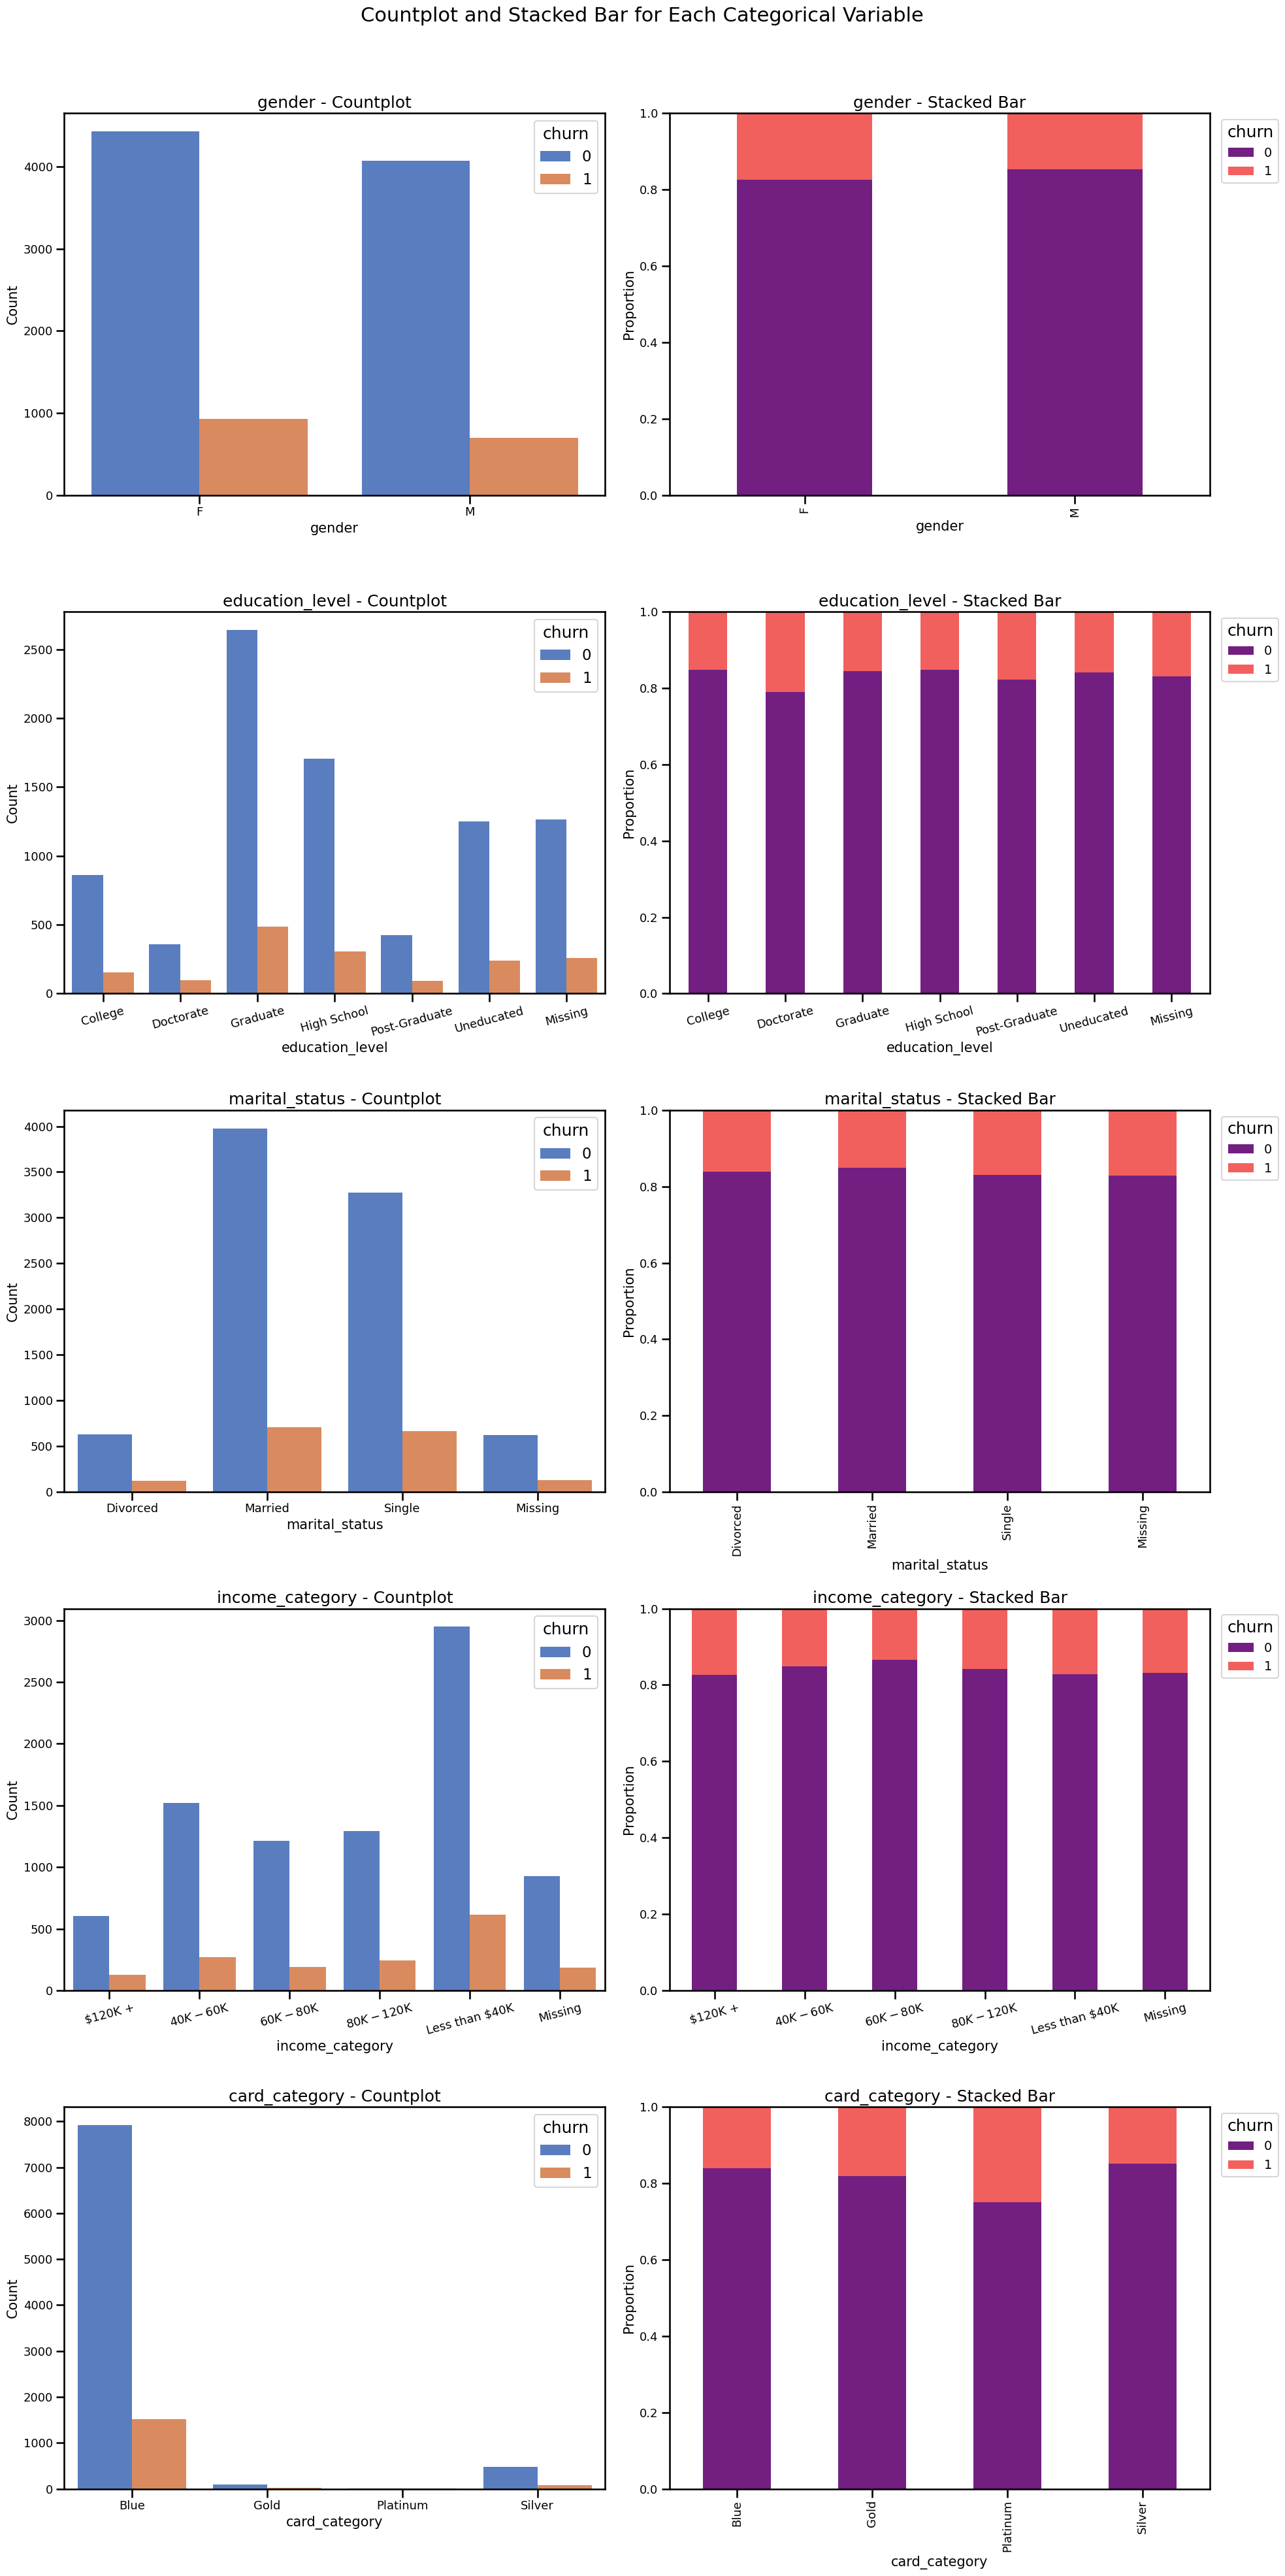

In [ ]:
categorical_columns = [
    'gender', 'education_level', 'marital_status', 'income_category', 'card_category'
]
plot_categorical_vs_target(df, categorical_columns)

## Observations:

- **`gender`**: Nearly identical churn proportions for M vs F → negligible effect.
- **`education_level`**: Churn is marginally higher among customers with ‘Doctorate’ and ‘Uneducated’ education levels → negligible effect.
- **`marital_status`**: Singles show slightly higher churn than married/divorced → negligible effect..
- **`income_category`**: 'Less than \$40K' & '\$120K+' show slightly higher churn proportion vs higher-income groups → negligible effect.
- **`card_category`**: Premium cards (Gold/Platinum) appear to have higher churn proportions, but those levels have very small counts (possible sampling noise).
- Likewise, **`customer_age `, `dependent_count`, `months_on_book`, `avg_open_to_buy`, `credit_limit`**: → negligible effect on churn.

# **4.4 Multivariate Analysis:**

- In this section we will analyze the relationships and correlations between multiple features to identify patterns that influence customer `churn`.

## **4.4.1 Investigate Subgroups**

### Bar chart of `card_category` groupby `age`:

Text(0.5, 1.0, 'card_category groupby age')

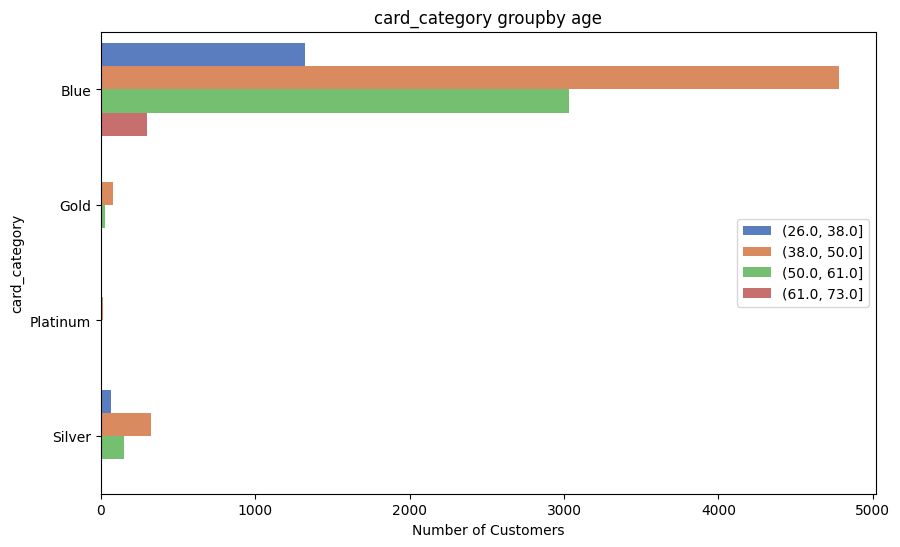

In [ ]:
df_viz = df.copy() # Creates a dedicated DataFrame as we add one column to DataFrame & don't want to add this col. to original df
                   # Or, we can work with temporary variable like: age_categories = pd.cut(df['Customer_Age'], bins=4, precision=0)

# Categorizing of Customer_Age into 4 categories
df_viz['age_categorized'] = pd.cut(df_viz['customer_age'], bins=4, precision=0)

plt.figure(figsize=(10,6))
sns.countplot(y='card_category', hue='age_categorized', data=df_viz, palette='muted')
plt.xlabel('Number of Customers')
plt.legend(loc = 'center right')
plt.title('card_category groupby age')

*Observations:*
- The **Blue card** is by far the most popular product across all age groups.
- The **38–50 age group is the largest segment** across **every card type**, indicating peak customer concentration in mid-life.

## Bar chart of `churn` groupby `age`:

Text(0.5, 1.0, 'churn groupby age')

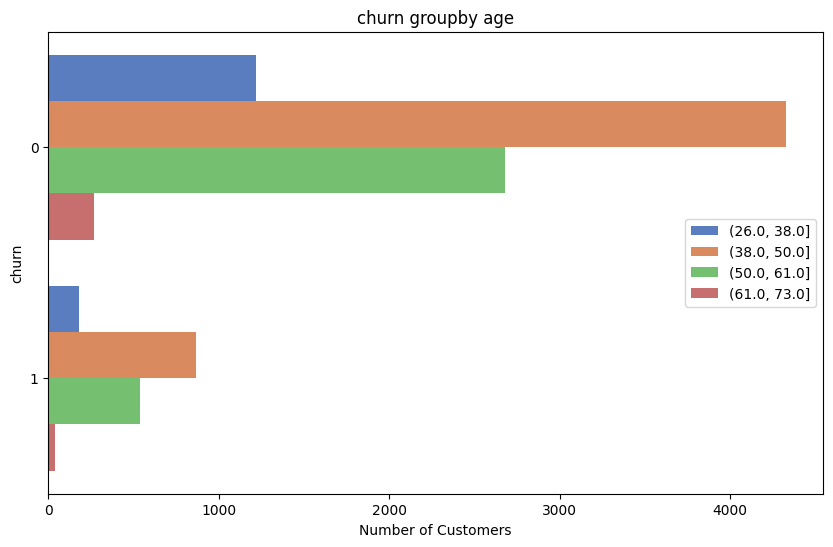

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y='churn', hue='age_categorized', data=df_viz, palette='muted')
plt.xlabel('Number of Customers')
plt.legend(loc = 'center right')
plt.title('churn groupby age')

*Observations:*
- The customer `churn` rate appears highest among middle-aged customer (38-50 years old), as this group has the largest number of attrited customers. While the younger (26-38) and older (50-61) age groups also experience churn, their numbers are notably lower.

## Bar chart of `income_category` groupby `age`:

Text(0.5, 1.0, 'income_category groupby age')

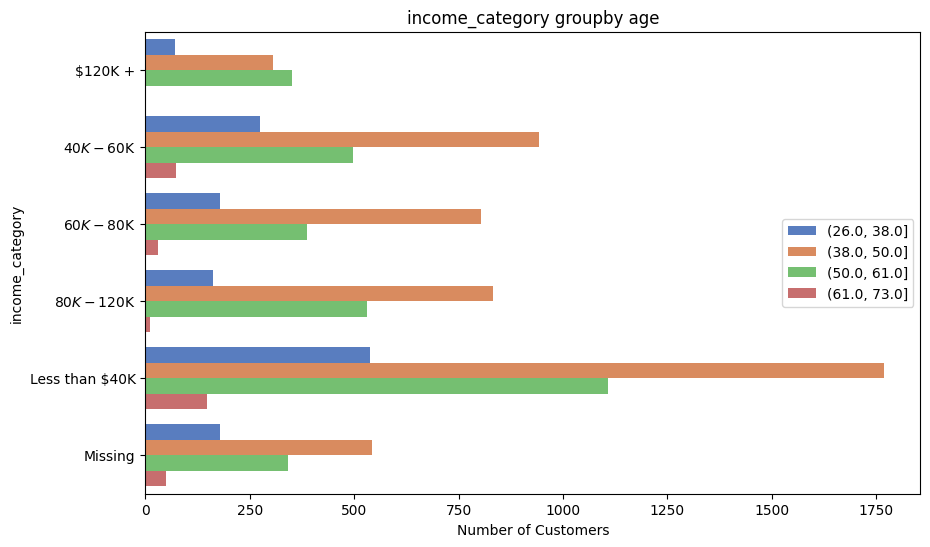

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y='income_category', hue='age_categorized', data=df_viz, palette='muted')
plt.xlabel('Number of Customers')
plt.legend(loc = 'center right')
plt.xlabel('Number of Customers')
plt.title('income_category groupby age')

*Observations:*
- The largest customer group is **38–50** years old, and this age band is especially dominant in the **"Less than $40K"** income category.
-This indicates your core customers are mid-aged with lower incomes.

## Bar chart `income_category` groupby `churn`:

Text(0.5, 1.0, 'Income Category groupby churn')

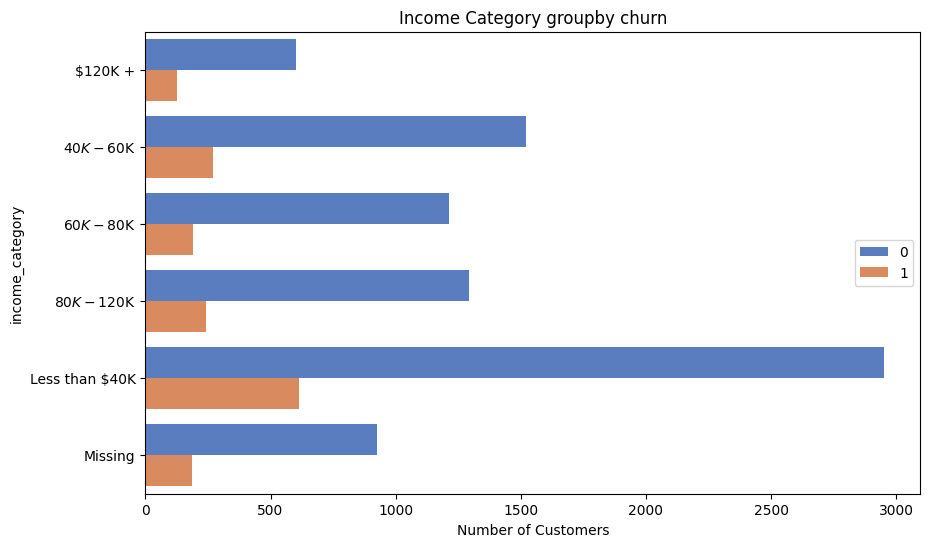

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y='income_category', hue='churn', data=df_viz, palette='muted')
plt.xlabel('Number of Customers')
plt.legend(loc = 'center right')
plt.title('Income Category groupby churn')

*Observation:*
- The charts show the largest customer group earns **less than $40K**, and this bracket also has the **highest churned** customers in absolute terms. While churn occurs across all income levels, it is most noticeable in this lower-income segment.

## **4.4.2 Pairwise Feature Relationships by `churn` Status**

In [ ]:
sns.set_palette("muted")
sns.pairplot(data=df, hue="churn", corner=True)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

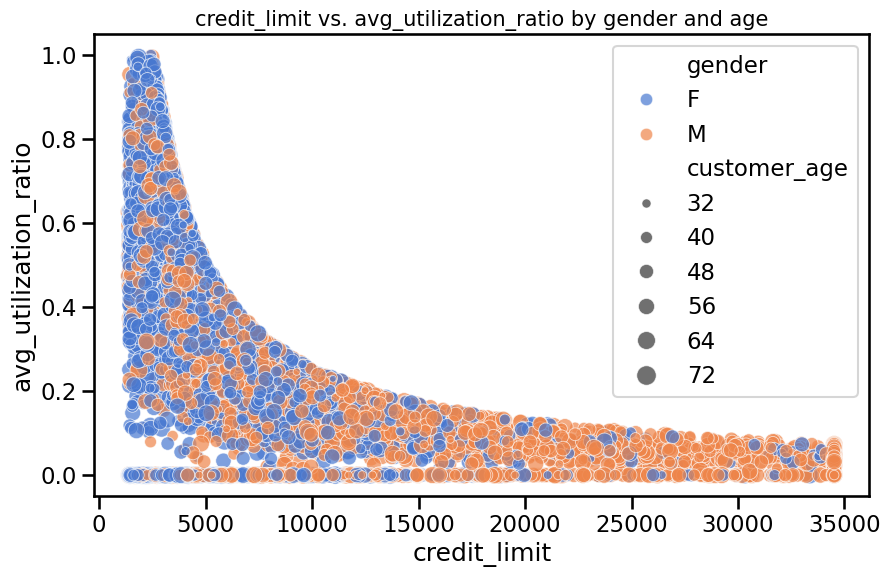

In [ ]:
# dive deeper into plots with interesting correlations
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x='credit_limit',
    y='avg_utilization_ratio',
    hue='gender',
    size='customer_age',
    palette='muted',
    alpha=0.7,       # Added transparency for overlapping points
    sizes=(20, 200)   # Control min/max marker size
).set_title('credit_limit vs. avg_utilization_ratio by gender and age', fontsize=15)

plt.show()

### There are strong correlations between some features; we’ll examine them in the correlation heatmap below.

## **4.5 Calculating and Displaying the Correlation Matrix**

In [ ]:
#correlation matrix
df.corr(numeric_only=True)

churn  customer_age  dependent_count  \
churn                     1.000000      0.018203         0.018991   
customer_age              0.018203      1.000000        -0.122254   
dependent_count           0.018991     -0.122254         1.000000   
months_on_book            0.013687      0.788912        -0.103062   
total_relationship_count -0.150005     -0.010931        -0.039076   
months_inactive_12_mon    0.152449      0.054361        -0.010768   
contacts_count_12_mon     0.204491     -0.018452        -0.040505   
credit_limit             -0.023873      0.002476         0.068065   
total_revolving_bal      -0.263053      0.014780        -0.002688   
avg_open_to_buy          -0.000285      0.001151         0.068291   
total_amt_chng_q4_q1     -0.131063     -0.062042        -0.035439   
total_trans_amt          -0.168598     -0.046446         0.025046   
total_trans_ct           -0.371403     -0.067097         0.049912   
total_ct_chng_q4_q1      -0.290054     -0.012143         0.011087   
avg_utilization_ratio    -0.178410      0.007114        -0.037135   

                          months_on_book  total_relationship_count  \
churn                           0.013687                 -0.150005   
customer_age                    0.788912                 -0.010931   
dependent_count                -0.103062                 -0.039076   
months_on_book                  1.000000                 -0.009203   
total_relationship_count       -0.009203                  1.000000   
months_inactive_12_mon          0.074164                 -0.003675   
contacts_count_12_mon          -0.010774                  0.055203   
credit_limit                    0.007507                 -0.071386   
total_revolving_bal             0.008623                  0.013726   
avg_open_to_buy                 0.006732                 -0.072601   
total_amt_chng_q4_q1           -0.048959                  0.050119   
total_trans_amt                -0.038591                 -0.347229   
total_trans_ct                 -0.049819                 -0.241891   
total_ct_chng_q4_q1            -0.014072                  0.040831   
avg_utilization_ratio          -0.007541                  0.067663   

                          months_inactive_12_mon  contacts_count_12_mon  \
churn                                   0.152449               0.204491   
customer_age                            0.054361              -0.018452   
dependent_count                        -0.010768              -0.040505   
months_on_book                          0.074164              -0.010774   
total_relationship_count               -0.003675               0.055203   
months_inactive_12_mon                  1.000000               0.029493   
contacts_count_12_mon                   0.029493               1.000000   
credit_limit                           -0.020394               0.020817   
total_revolving_bal                    -0.042210              -0.053913   
avg_open_to_buy                        -0.016605               0.025646   
total_amt_chng_q4_q1                   -0.032247              -0.024445   
total_trans_amt                        -0.036982              -0.112774   
total_trans_ct                         -0.042787              -0.152213   
total_ct_chng_q4_q1                    -0.038989              -0.094997   
avg_utilization_ratio                  -0.007503              -0.055471   

                          credit_limit  total_revolving_bal  avg_open_to_buy  \
churn                        -0.023873            -0.263053        -0.000285   
customer_age                  0.002476             0.014780         0.001151   
dependent_count               0.068065            -0.002688         0.068291   
months_on_book                0.007507             0.008623         0.006732   
total_relationship_count     -0.071386             0.013726        -0.072601   
months_inactive_12_mon       -0.020394            -0.042210        -0.016605   
contacts_count_12_mon         0.020817    

## **4.6 Visualizing Feature Correlations with a Heatmap**

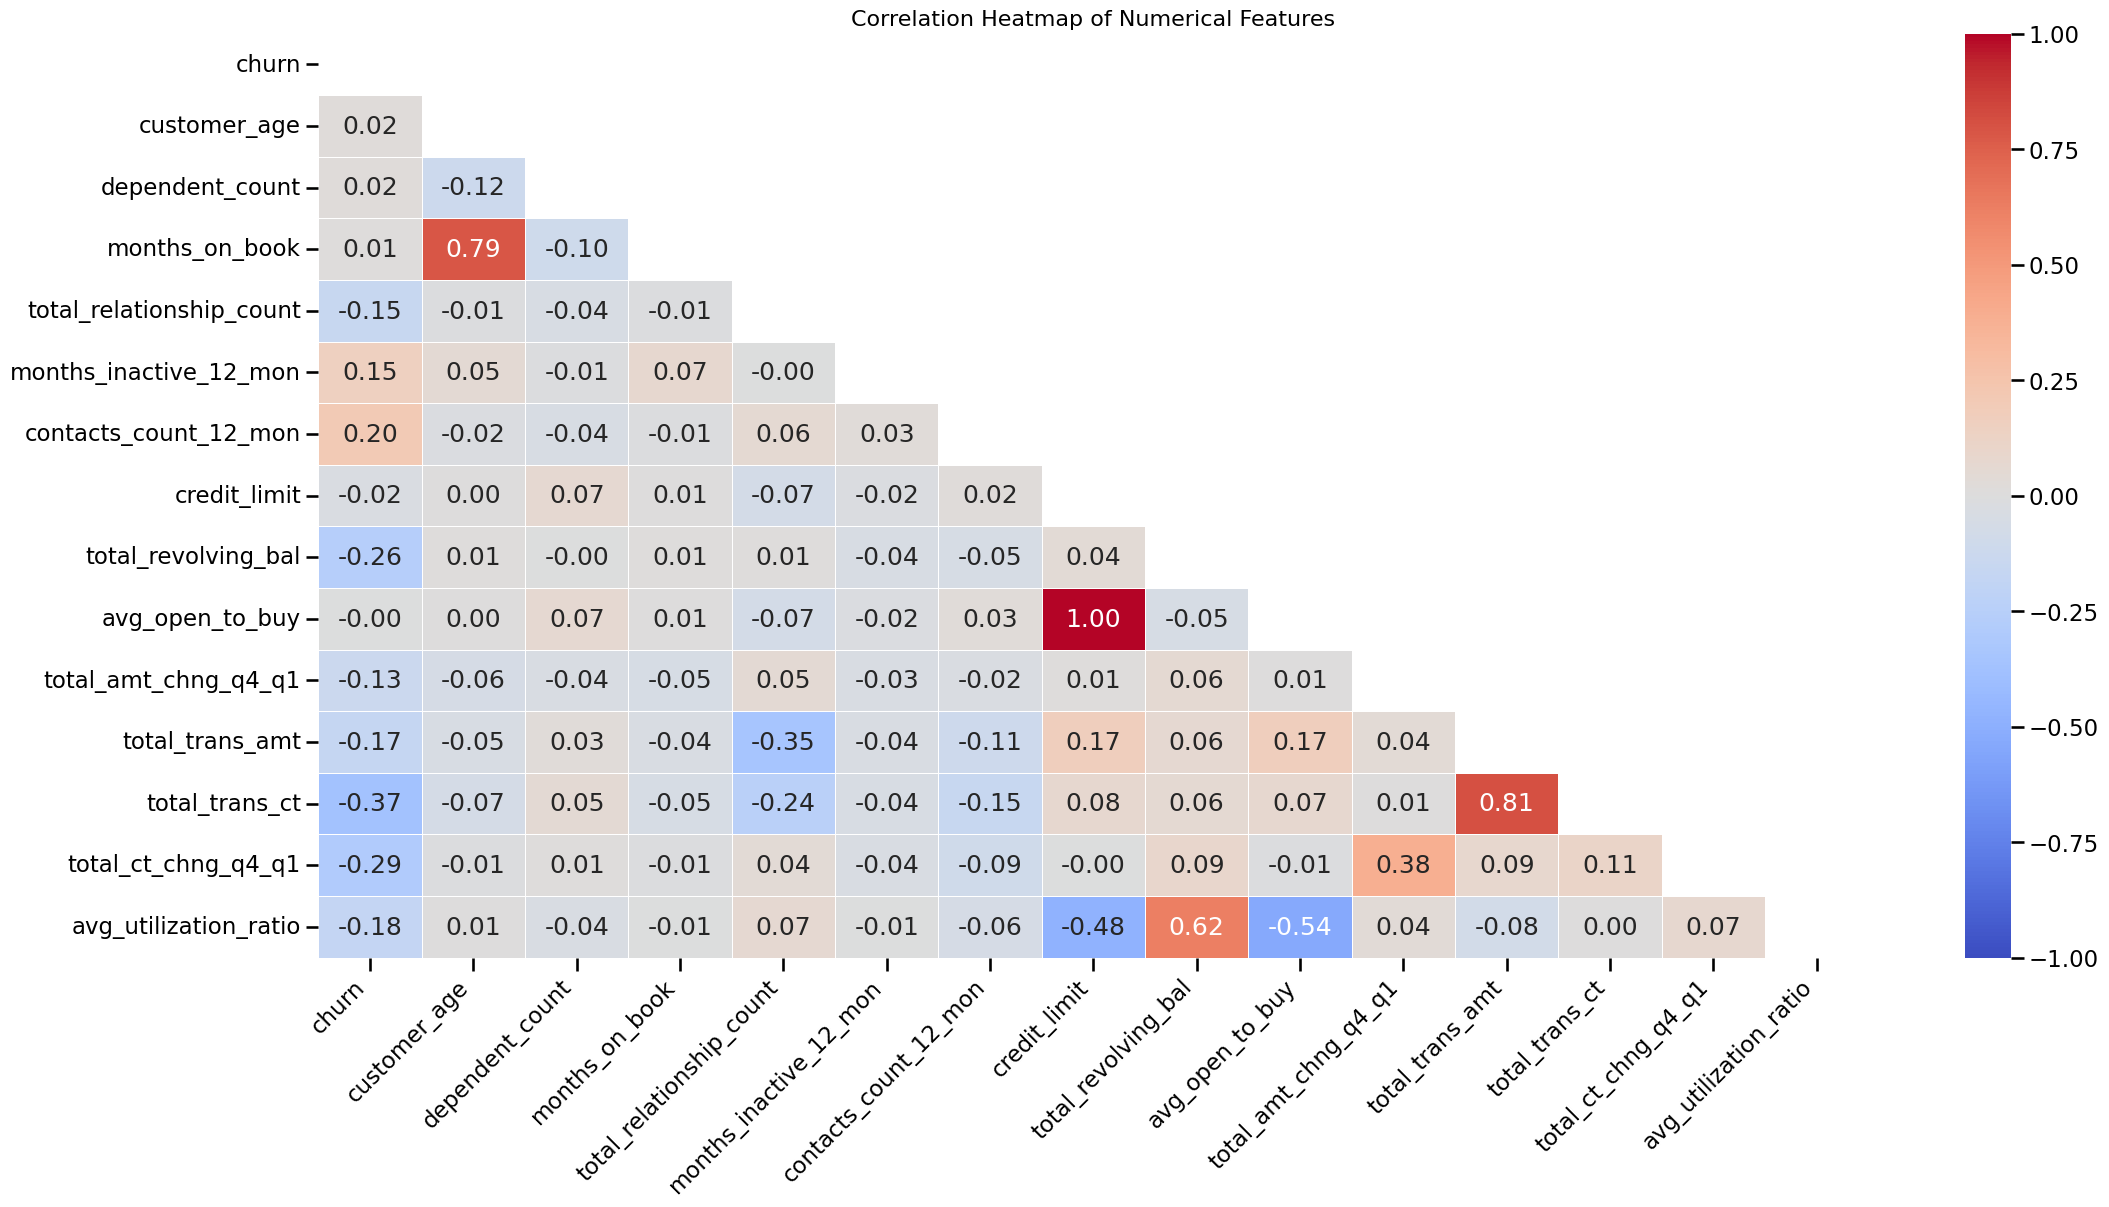

In [ ]:
plt.figure(figsize=(25, 12))

# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create a mask for the upper triangle
# np.triu creates a mask for the upper triangle of an array
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    mask=mask,           # Apply the mask to hide the upper triangle
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    vmin=-1,
    vmax=1,
    linewidths=.5
)

plt.xticks(rotation=45, ha='right')

plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

*Observations:*

- **`credit_limit`** and **`avg_open_to_buy`**: Correlation = **1.00** (perfect correlation)

***Interpretation:***  These are functionally identical,as `avg_open_to_buy` = `credit_limit` - `total_revolving_bal`. Keep only one.

- **`customer_age`** and **`months_on_book`**: Correlation = **0.79** (strong positive)
- **`total_revolving_bal`** and **`avg_utilization_ratio`**: Correlation = **0.62** (moderate positive)
- **`credit_limit`** and **`avg_utilization_ratio`**: Correlation = **-0.48** (moderate negative)
-  **`avg_open_to_buy`** and **`avg_utilization_ratio`**: Correlation = **-0.54** (moderate negative)

- Customer **`churn`** shows less correlation with variables such as **`customer_age`**, **`dependent_count`**, **`months_on_book`**, **`avg_open_to_buy`**, and **`credit_limit`**.

# **5. Data Preprocessing**

In this section we will do
- 1. Standardize Feature Names
- 2. Drop Unnecessary Columns
- 3. Data Splitting
- 4. Missing Value / Incorrect Value Treatment
- 5. Encoding (for categorical features)
- 6. Scaling / Outlier Treatment (for numerical features)

## **5.1 Standardize Feature Names:**

The column names were already standardized in the `Initial Data Preprocessing` section above.

## **5.2 Drop Unnecessary Columns**

In addition to `CLIENTNUM` which was removed earlier, we will now also drop the `avg_open_to_buy` and `months_on_book` columns.

**Reason:**

`credit_limit` and `avg_open_to_buy`: Correlation = 1.00 (perfect correlation)

`customer_age` and `months_on_book`: Correlation = 0.79 (strong positive)

In [ ]:
df.drop(columns=['avg_open_to_buy','months_on_book'],inplace=True)

In [ ]:
#Verify
df.columns.shape

(18,)

## **5.3 Data Splitting:**

In [ ]:
X=df.drop(columns=['churn'])
y=df['churn']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=12)

In [ ]:
X_train.shape

(8101, 17)

## **5.4 Handling Missing Value / Incorrect Value,**
## **5.5 Encoding (for categorical features),**
## **5.6 Scaling / Outlier Treatment (for numerical features):→**

- Replace "Unknown" with "Missing" in categorical features: Done in `Initial Data Preprocessing` section.

In [ ]:
X_train.columns

Index(['customer_age', 'gender', 'dependent_count', 'education_level',
       'marital_status', 'income_category', 'card_category',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'total_amt_chng_q4_q1', 'total_trans_amt', 'total_trans_ct',
       'total_ct_chng_q4_q1', 'avg_utilization_ratio'],
      dtype='object')

### **5.6.1 Building the Preprocessing Pipeline:**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler  #RobustScaler() robust to outliers

# Define feature groups
numeric_features = [
    'customer_age', 'dependent_count', 'total_relationship_count',
     'months_inactive_12_mon', 'contacts_count_12_mon', 'credit_limit',
     'total_revolving_bal', 'total_amt_chng_q4_q1', 'total_trans_amt',
     'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'
]

ordinal_features = ['education_level']   # Ordinal features
education_categories = ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate', 'Missing']

nominal_features = ['gender', 'marital_status', 'income_category', 'card_category']



preprocessor = ColumnTransformer(
    transformers=[
        # All numerics: Mean impute → Scaling
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', RobustScaler())  # RobustScaler provides strong outlier handling for scaling
        ]), numeric_features),

        # Ordinal categorical: Mode impute → OrdinalEncoder → RobustScaler
        ('cat_ordinal', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('ordinal', OrdinalEncoder(
                categories=[education_categories],  # Define order explicitly
                handle_unknown='use_encoded_value', # Handle unknown categories
                unknown_value=-1  # Assign -1 for unknown categories
            )),
            ('scaler', RobustScaler())  # Scale the ordinal encoded values
        ]), ordinal_features),


        # Nominal categorical: most frequent (Mode) impute → Smart OHE
        ('cat_nominal', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('ohe', OneHotEncoder(
                handle_unknown='ignore',
                sparse_output=False,  # Return array for easier handling
                drop='first'  # Drops redundant columns for binary features.
            ))
        ]), nominal_features)
    ],
    remainder='drop',  # Explicitly ignore other columns
    n_jobs=-1
)

In [ ]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# **6. Model Building: Key Evaluation Considerations:**

### **6.1 Why Model Evaluation Criteria Matter ?**

When predicting customer churn, it's important to understand the consequences of different types of mistakes:

**1. False Positive:** The model predicts a customer will leave, but they actually stay.

- **Cost:** We might spend resources on unnecessary retention offers.

**2. False Negative:** The model predicts a customer will stay, but they actually leave.

- **Cost:** We lose the customer and all their future business because we didn't act.

### **6.2 Which Type of Mistake Matters More?**

For banks, false negatives are more serious. If a model fails to identify a customer who is about to leave, the bank loses its chance to retain that customer—potentially resulting in financial loss.

### **6.3 Objective & evaluation metric :**

**Goal:** Reduce false negatives.

**Primary metric:** **Recall** for the positive class (`churn` = 1). Higher recall → fewer false negatives.

**Recall answers:** "Of all the customers who actually left, how many did the model correctly identify?"
- We still report other metrics (precision, F1, ROC-AUC), but use recall to choose/tune the model.

### **6.4 Our Modeling and Tuning Plan :**

To find the best possible model, we will follow these steps:

**1. Build Several Models:** We will start by training a variety of different classification models to see which ones perform well.

**2. Use Cross-Validation:** We'll use Stratified K-Fold Cross-Validation to get a reliable and stable measure of each model's performance on our training data.

**3. Tune the Best Models:** We will take the most promising models and use `GridSearchCV` to fine-tune their settings, specifically optimizing them to achieve the highest possible Recall.

# **7. Model Evaluation Functions:**

In [ ]:
from sklearn.metrics import (
    PrecisionRecallDisplay, RocCurveDisplay, ConfusionMatrixDisplay,
    classification_report, roc_auc_score, accuracy_score, recall_score
)
from sklearn.model_selection import GridSearchCV
from joblib import parallel_backend

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

### **7.1 Standard Model Evaluation Functions:**

In [ ]:
def train_and_tune(clf, model_name, X_train, y_train, X_test, y_test, param_grid, cv=5):
    """
    Train classifier, visualize performance and tune hyperparameters.

    Parameters
    ----------
    clf : sklearn-like classifier
    model_name : str
        Name identifier for the classifier (used in plots and prints).
    param_grid : dict
        Dictionary with hyperparameters to tune during grid search.

    Returns
    -------
    best_model : Classifier trained with the best parameters found in grid search.
    """

    # Fit initial model
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    y_test_proba = clf.predict_proba(X_test)[:, 1] # for calculate ROC-AUC score

    # Create evaluation plots: BASELINE MODEL
    fig, axs = plt.subplots(1, 3, figsize=(19, 6.5))
    fig.suptitle(f'Model: {model_name}')

    PrecisionRecallDisplay.from_estimator(clf, X_test, y_test, ax=axs[0])
    axs[0].set_title('Precision-Recall Curve')

    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=axs[1])
    axs[1].set_title('ROC Curve')

    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, ax=axs[2])
    axs[2].set_title('Confusion Matrix')

    plt.tight_layout()
    plt.show()

    # Print classification metrics
    print('\nClassification Report (Test Set):')
    print(classification_report(y_test, y_test_pred))
    print(f'ROC-AUC Score: {roc_auc_score(y_test, y_test_proba):.2f}')
    print(f'Recall: {recall_score(y_test, y_test_pred):.2f}')
    print(f'Accuracy: {accuracy_score(y_test, y_test_pred):.2f}')

    # Hyperparameter tuning with GridSearchCV
    # Optimize for recall (most important for churn prediction)
    print('\nStarting Grid Search CV... ... ...')
    print('='*60)
    scoring = ['accuracy', 'recall', 'precision', 'f1', 'roc_auc']
    grid = GridSearchCV(
        clf, param_grid,
        cv=cv,
        scoring=scoring,  # Multiple metrics
        refit='recall',   # Choose best model based on recall
        n_jobs=-1
    )

    with parallel_backend('threading'):
        grid.fit(X_train, y_train)

    print('Best Parameters:', grid.best_params_)
    print(f'Best CV recall: {grid.best_score_:.2f}')


    # Evaluate optimized model
    best_model = grid.best_estimator_
    best_pred = best_model.predict(X_test)
    print(f'Optimized Accuracy: {accuracy_score(y_test, best_pred):.2f}')
    print('\nClassification Report (Optimized Model):')
    print(classification_report(y_test, best_pred))

    # Create evaluation plots: Optimized Model
    fig, axs = plt.subplots(1, 3, figsize=(19, 6.5))
    fig.suptitle(f'Model: {model_name} (Tuned / Optimized)')
    PrecisionRecallDisplay.from_estimator(best_model, X_test, y_test, ax=axs[0])
    axs[0].set_title('Precision-Recall Curve')
    RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=axs[1])
    axs[1].set_title('ROC Curve')
    ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, ax=axs[2])
    axs[2].set_title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

    return best_model

## **7.2 Rebalancing the Training Set Using SMOTE :**

- In many real-world problems, the dataset contains a large majority of one class compared to a rare minority class. This imbalance can cause ordinary machine learning models to largely overlook the minority group, which is usually the most important to identify—like churners in a customer dataset.

- A widely used solution to this challenge is to increase the presence of the minority class in the training data. Instead of simply repeating rare records (which doesn't add any useful diversity), we can synthetically generate new, plausible examples from the data itself. This method, known as SMOTE (Synthetic Minority Oversampling Technique), enriches the minority class through creative data augmentation.

- By using SMOTE, we create a more balanced training set so our classifier can more effectively learn patterns relevant to the rare class, leading to better recall and more actionable predictions.

**SMOTE-Enabled Model Evaluation Function:**

In [ ]:
def smote_train_tune(clf, X_train, X_test, y_train, y_test, param_grid, cv=5):
    """
    SMOTE + GridSearchCV using imblearn Pipeline (prevents data leakage).
    Shows data distribution before and after SMOTE.
    """
    print("Original class distribution:")
    print(pd.Series(y_train).value_counts())

    # Apply SMOTE separately just to show the distribution
    smote_demo = SMOTE(random_state=42)
    X_res, y_res = smote_demo.fit_resample(X_train, y_train)
    print("\nAfter SMOTE:")
    print(pd.Series(y_res).value_counts())

    # Create pipeline for proper CV (this prevents data leakage)
    pipe = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('clf', clf)
    ])

    # Hyperparameter tuning with GridSearchCV
    # Optimize for recall (most important for churn prediction)
    scoring = ['accuracy', 'recall', 'precision', 'f1', 'roc_auc']
    grid = GridSearchCV(
        pipe, param_grid,
        cv=cv,
        scoring=scoring,  # Multiple metrics
        refit='recall',   # Choose best model based on recall
        n_jobs=-1
    )

    with parallel_backend('threading'):
        grid.fit(X_train, y_train)

    print('Best Parameters:', grid.best_params_)
    # print(f'\nBest CV Recall: {grid.best_score_:.2f}')


    # Evaluate on test set
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]

    # Print metrics
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_proba):.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Create evaluation plots: Optimized Model
    fig, axs = plt.subplots(1, 3, figsize=(19, 6.5))
    PrecisionRecallDisplay.from_estimator(best_model, X_test, y_test, ax=axs[0])
    axs[0].set_title('Precision-Recall Curve')
    RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=axs[1])
    axs[1].set_title('ROC Curve')
    ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, ax=axs[2])
    axs[2].set_title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

    return best_model

# **8. Model training**

## **8.1 Logistic Regression**

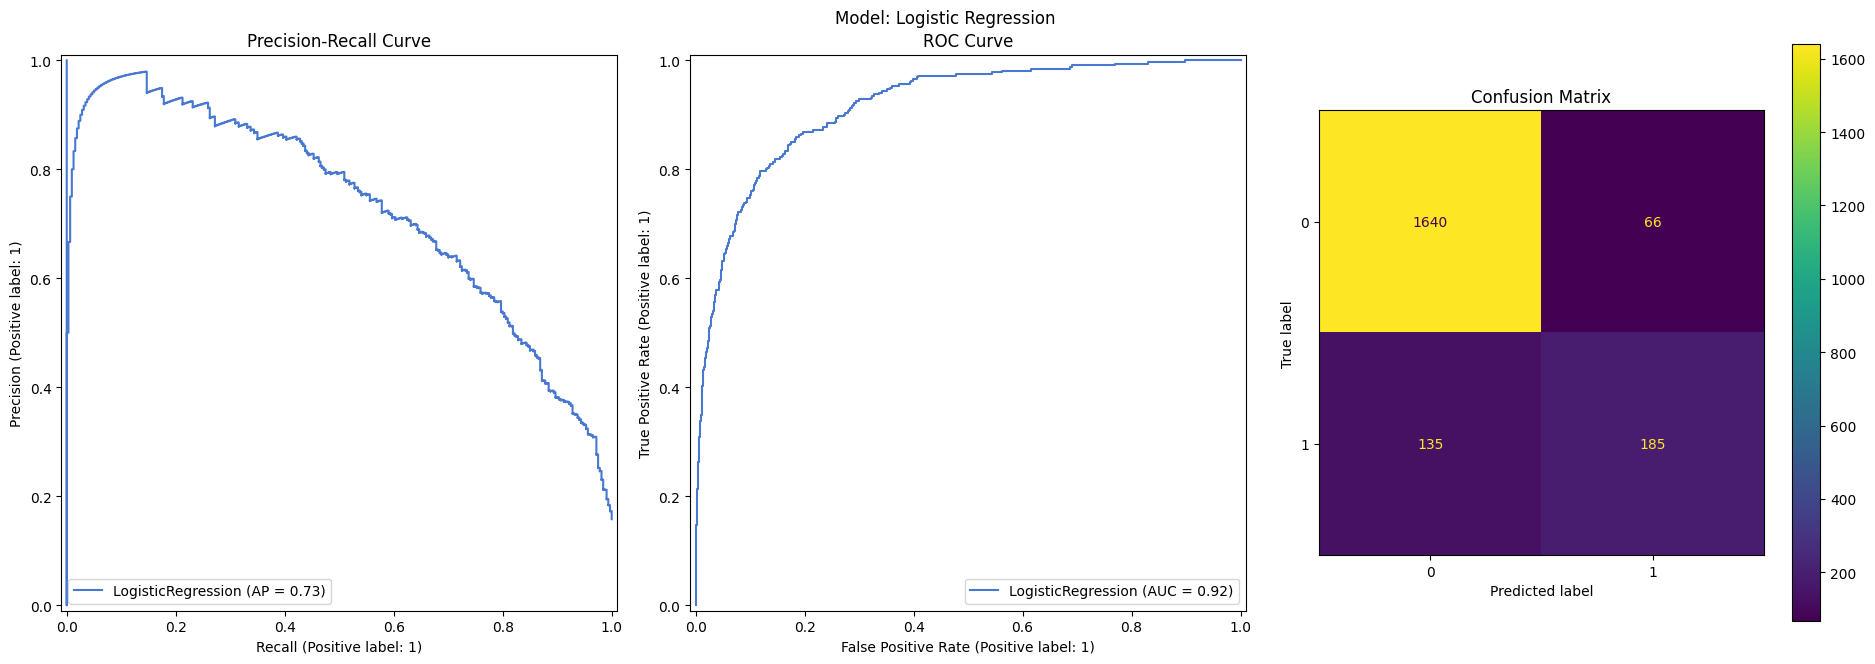


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1706
           1       0.74      0.58      0.65       320

    accuracy                           0.90      2026
   macro avg       0.83      0.77      0.80      2026
weighted avg       0.89      0.90      0.90      2026

ROC-AUC Score: 0.92
Recall: 0.58
Accuracy: 0.90

Starting Grid Search CV... ... ...
Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV recall: 0.60
Optimized Accuracy: 0.90

Classification Report (Optimized Model):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1706
           1       0.73      0.57      0.64       320

    accuracy                           0.90      2026
   macro avg       0.83      0.77      0.79      2026
weighted avg       0.89      0.90      0.89      2026



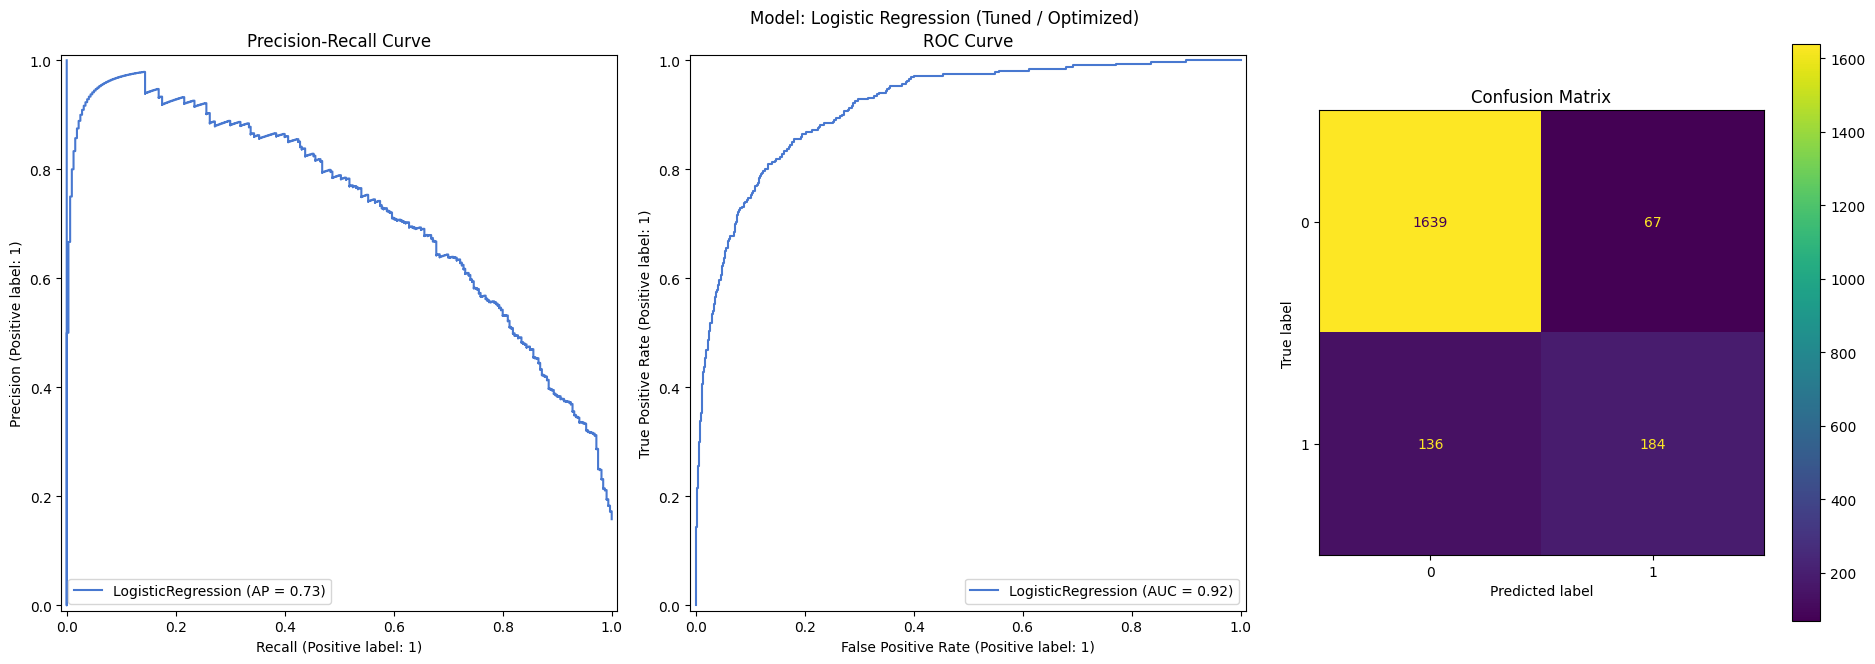

In [ ]:
# Define parameter grid for hyperparameter tuning
lor_param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength(smaller = more regularization)
    'penalty': ['l1', 'l2', 'elasticnet'],  # Regularization type
    'solver': ['liblinear', 'saga'],  # Solvers that support l1 penalty
}

# Train and evaluate the model
best_lor = train_and_tune(
    clf=LogisticRegression( max_iter=1000, random_state=42),
    model_name="Logistic Regression",
    X_train=X_train_preprocessed,
    y_train=y_train,
    X_test=X_test_preprocessed,
    y_test=y_test,
    param_grid=lor_param_grid,
    cv=5
)

## **SMOTE + Logistic Regression**

Original class distribution:
churn
0    6794
1    1307
Name: count, dtype: int64

After SMOTE:
churn
0    6794
1    6794
Name: count, dtype: int64
Best Parameters: {'clf__C': 0.01, 'clf__class_weight': None, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}

Best CV Recall: 0.85
Test Accuracy: 0.85

ROC-AUC Score: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1706
           1       0.52      0.82      0.63       320

    accuracy                           0.85      2026
   macro avg       0.74      0.84      0.77      2026
weighted avg       0.89      0.85      0.86      2026



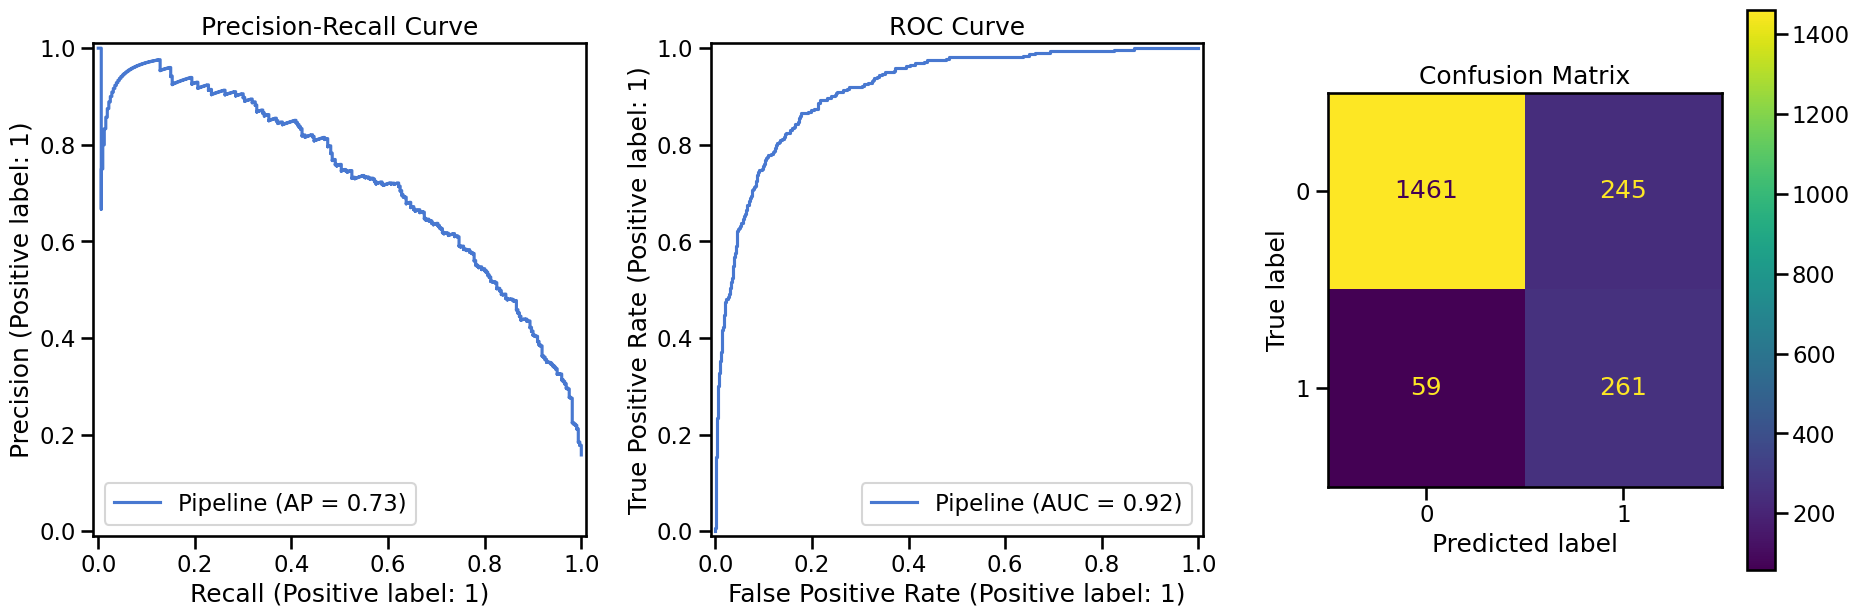

In [ ]:
lor_smote_param_grid = {
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l1', 'l2'],
    'clf__solver': ['liblinear', 'saga'],
    'clf__class_weight': [None, 'balanced'] # 'balanced'-->Handle class imbalance
}

# Train and evaluate with SMOTE
best_lor_smote = smote_train_tune(
    clf=LogisticRegression(random_state=42, max_iter=1000),
    X_train=X_train_preprocessed,
    X_test=X_test_preprocessed,
    y_train=y_train,
    y_test=y_test,
    param_grid=lor_smote_param_grid,
    cv=5
)

## **8.2 Decision Tree Classification**

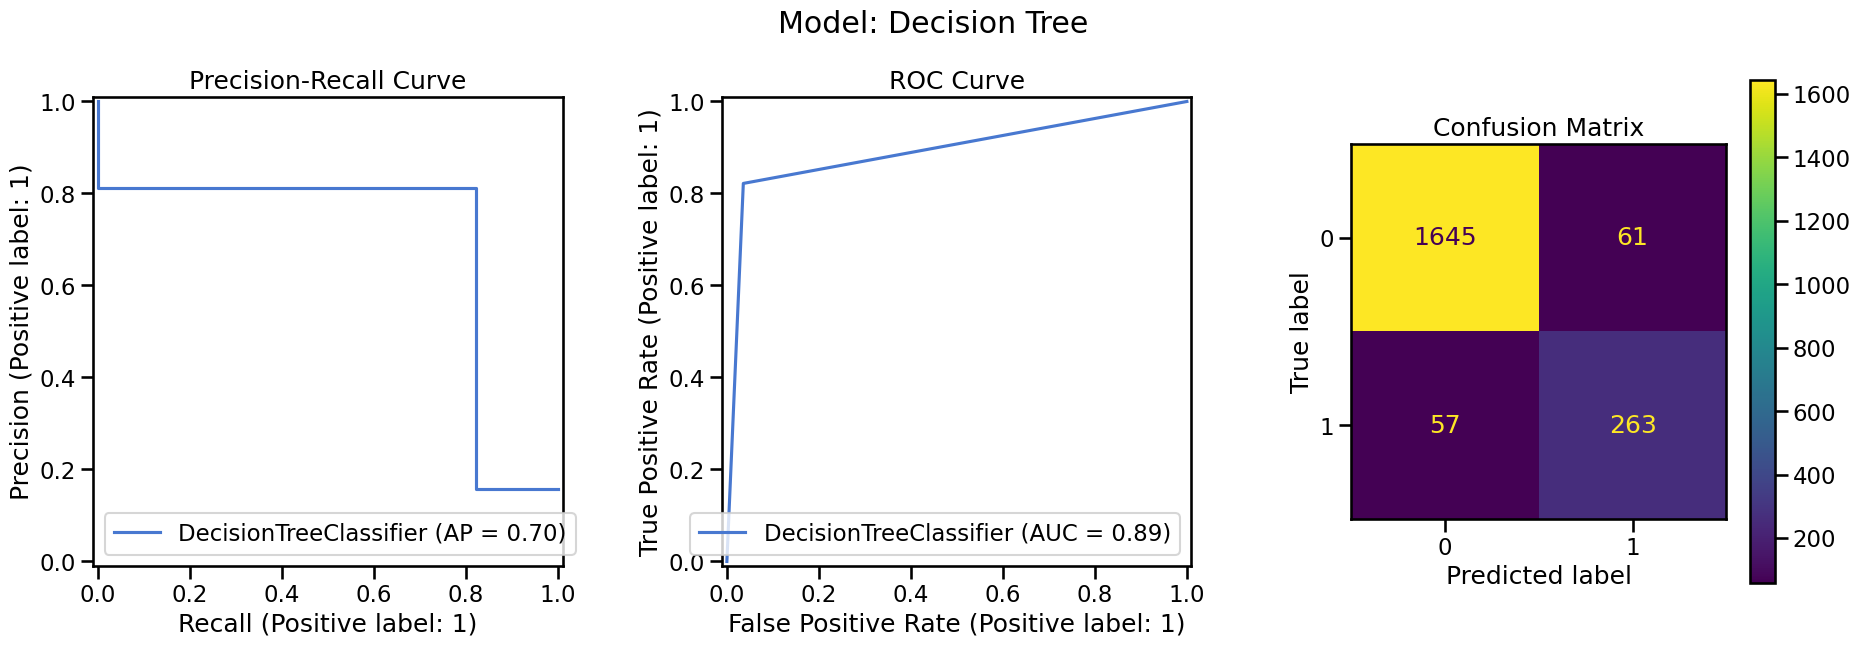


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1706
           1       0.81      0.82      0.82       320

    accuracy                           0.94      2026
   macro avg       0.89      0.89      0.89      2026
weighted avg       0.94      0.94      0.94      2026

ROC-AUC Score: 0.89
Recall: 0.82
Accuracy: 0.94

Starting Grid Search CV... ... ...
Best Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best CV recall: 0.91
Optimized Accuracy: 0.92

Classification Report (Optimized Model):
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1706
           1       0.67      0.93      0.78       320

    accuracy                           0.92      2026
   macro avg       0.83      0.92      0.87      2026
weighted avg       0.94      0.92      0.92      2026



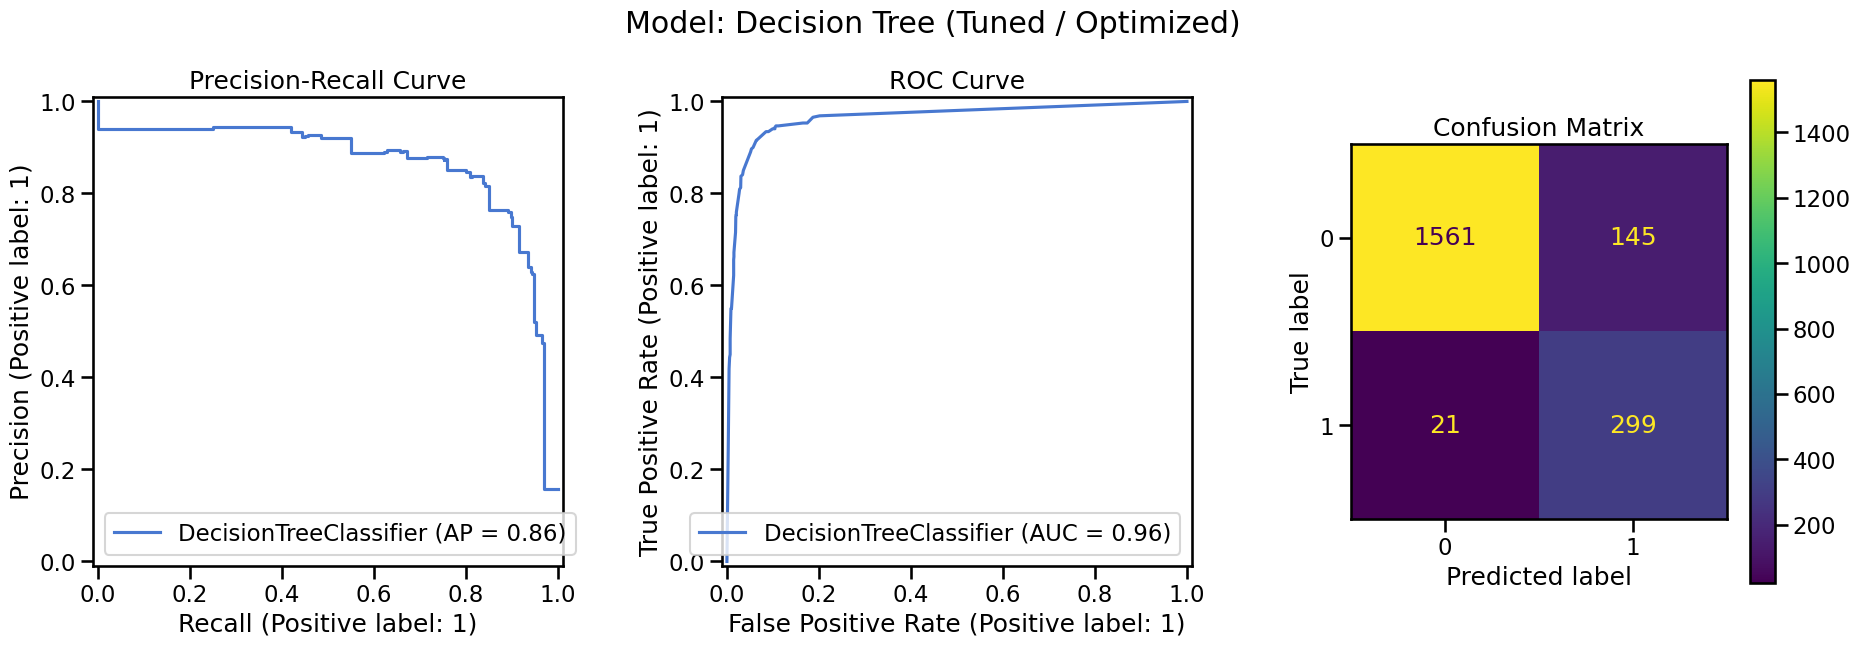

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

# Train and tune the Decision Tree model
best_dt = train_and_tune(
    clf=DecisionTreeClassifier(random_state=42),
    model_name='Decision Tree',
    X_train=X_train_preprocessed,
    y_train=y_train,
    X_test=X_test_preprocessed,
    y_test=y_test,
    param_grid=param_grid,
    cv=5
)

## **SMOTE + Decision Tree**

Original class distribution:
churn
0    6794
1    1307
Name: count, dtype: int64

After SMOTE:
churn
0    6794
1    6794
Name: count, dtype: int64
Best Parameters: {'clf__class_weight': None, 'clf__criterion': 'gini', 'clf__max_depth': 7, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}

Best CV Recall: 0.88
Test Accuracy: 0.92

ROC-AUC Score: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1706
           1       0.70      0.90      0.79       320

    accuracy                           0.92      2026
   macro avg       0.84      0.91      0.87      2026
weighted avg       0.94      0.92      0.93      2026



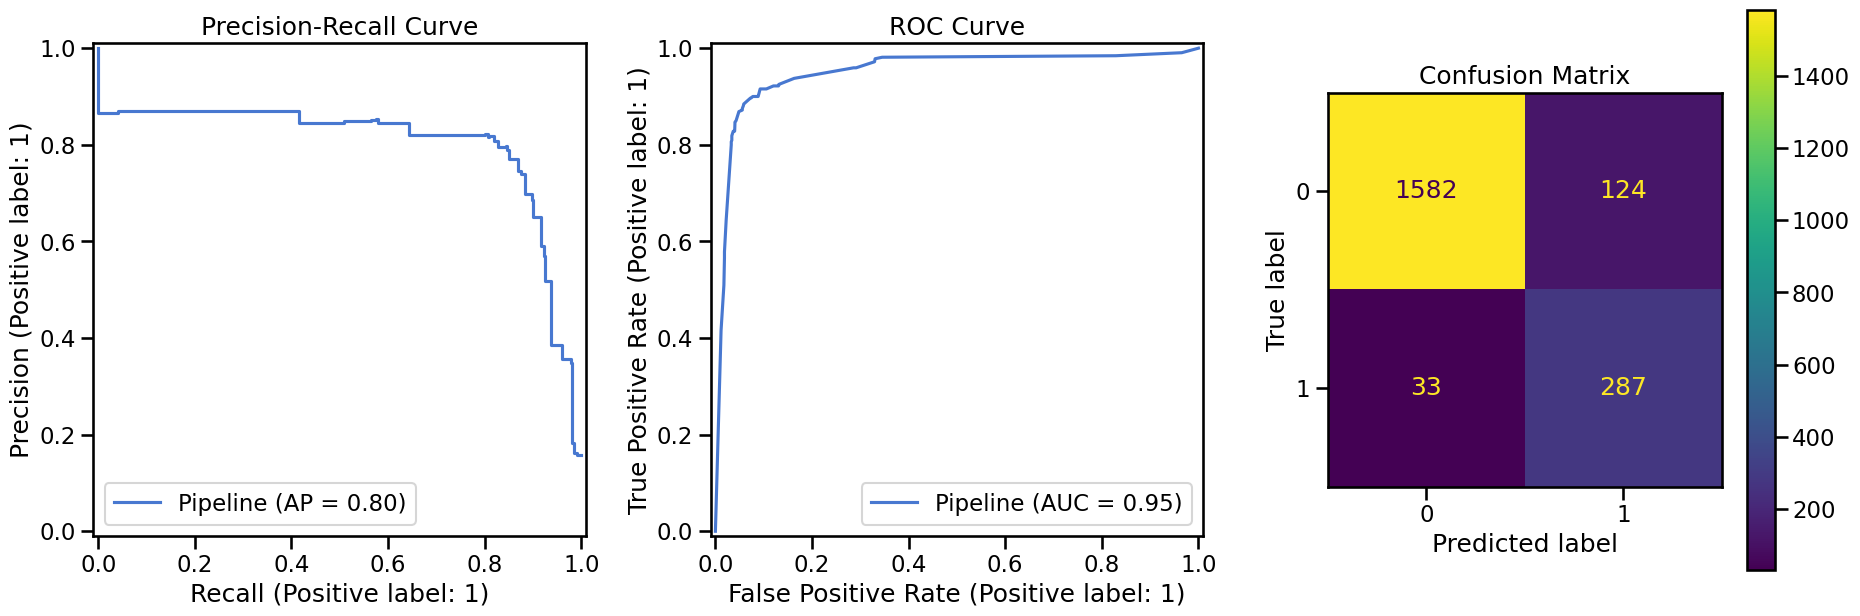

In [ ]:
dt_param_grid = {
    'clf__max_depth': [3, 5, 7, 10, 15, None],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__criterion': ['gini', 'entropy'],
    'clf__class_weight': [None, 'balanced']
}

# Train and evaluate Decision Tree with SMOTE
best_dt_smote = smote_train_tune(
    clf=DecisionTreeClassifier(random_state=42),
    X_train=X_train_preprocessed,
    X_test=X_test_preprocessed,
    y_train=y_train,
    y_test=y_test,
    param_grid=dt_param_grid,
    cv=5
)

# **8.3 Random Forest (Bagging with Decision Trees)**

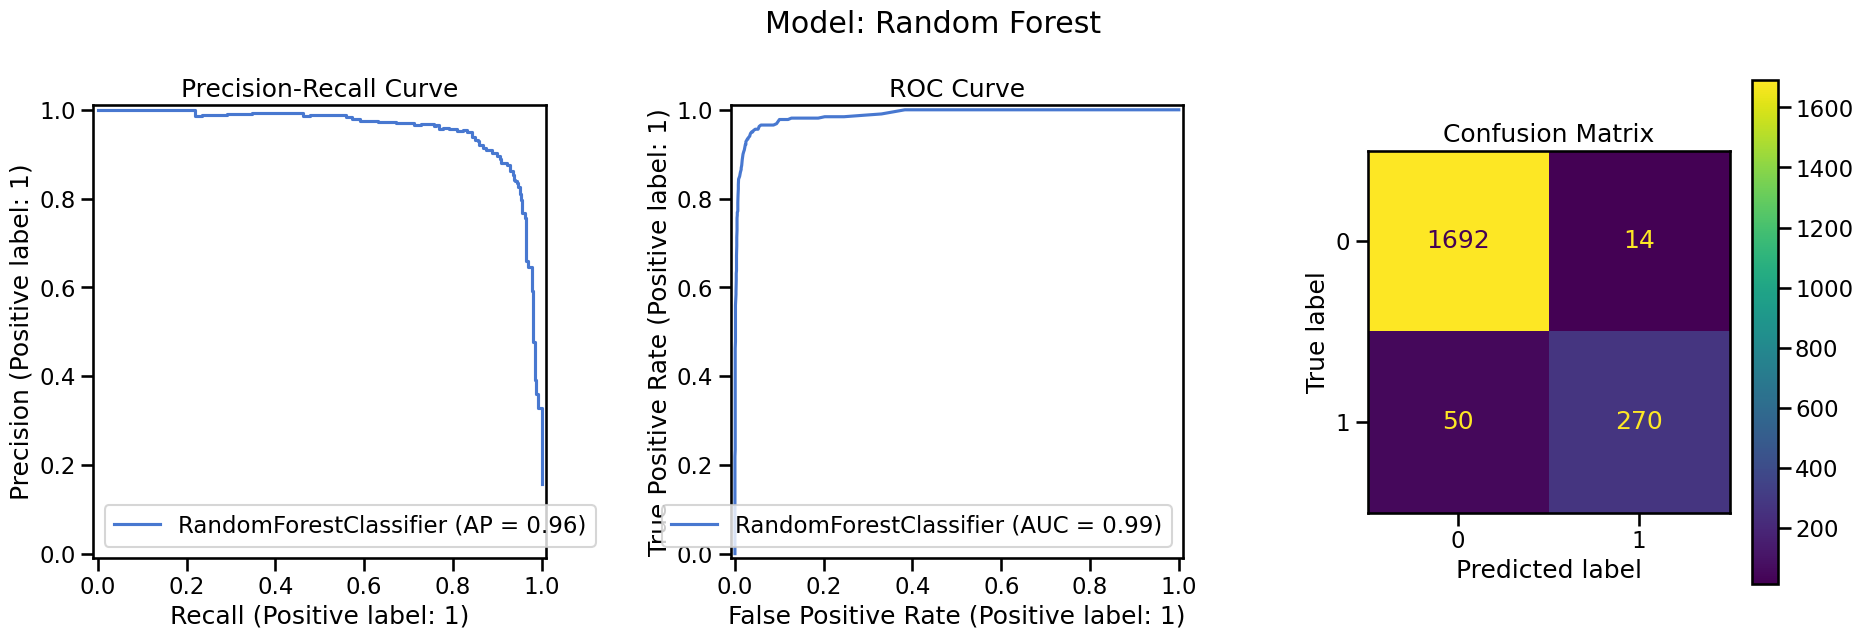


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1706
           1       0.95      0.84      0.89       320

    accuracy                           0.97      2026
   macro avg       0.96      0.92      0.94      2026
weighted avg       0.97      0.97      0.97      2026

ROC-AUC Score: 0.99
Recall: 0.84
Accuracy: 0.97

Starting Grid Search CV... ... ...
Best Parameters: {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best CV recall: 0.90
Optimized Accuracy: 0.91

Classification Report (Optimized Model):
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1706
           1       0.67      0.90      0.77       320

    accuracy                           0.91      2026
   macro avg       0.82      0.91      0.86      2026
weighted avg       0.

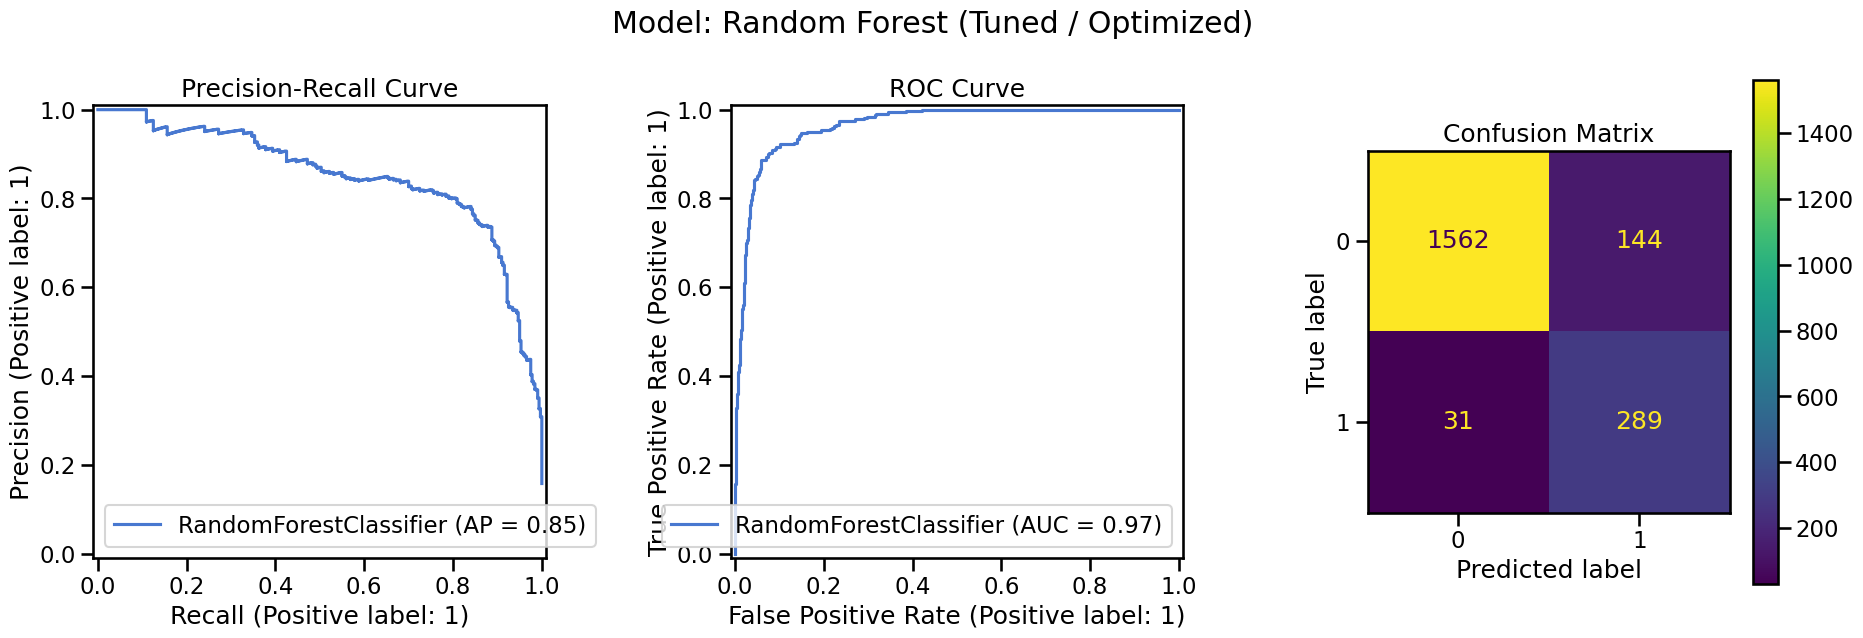

In [ ]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],   # No. of trees
    'max_depth': [5, 10, 15, None],   # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],     # Min samples at leaf node
    'max_features': ['sqrt', 'log2', None],   # Features to consider for best split
    'class_weight': [None, 'balanced'],  # Handle class imbalance
    'bootstrap': [True]  # Use replacement sampling
}

best_rf = train_and_tune(
    clf=RandomForestClassifier(random_state=42, n_jobs=-1),
    model_name="Random Forest",
    X_train=X_train_preprocessed,
    y_train=y_train,
    X_test=X_test_preprocessed,
    y_test=y_test,
    param_grid=rf_param_grid,
    cv=5
)

# **SMOTE + Random Forest**

Original class distribution:
churn
0    6794
1    1307
Name: count, dtype: int64

After SMOTE:
churn
0    6794
1    6794
Name: count, dtype: int64
Best Parameters: {'clf__bootstrap': True, 'clf__class_weight': None, 'clf__max_depth': 10, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 10, 'clf__n_estimators': 50}

Best CV Recall: 0.88
Test Accuracy: 0.95

ROC-AUC Score: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1706
           1       0.83      0.90      0.86       320

    accuracy                           0.95      2026
   macro avg       0.90      0.93      0.92      2026
weighted avg       0.96      0.95      0.95      2026



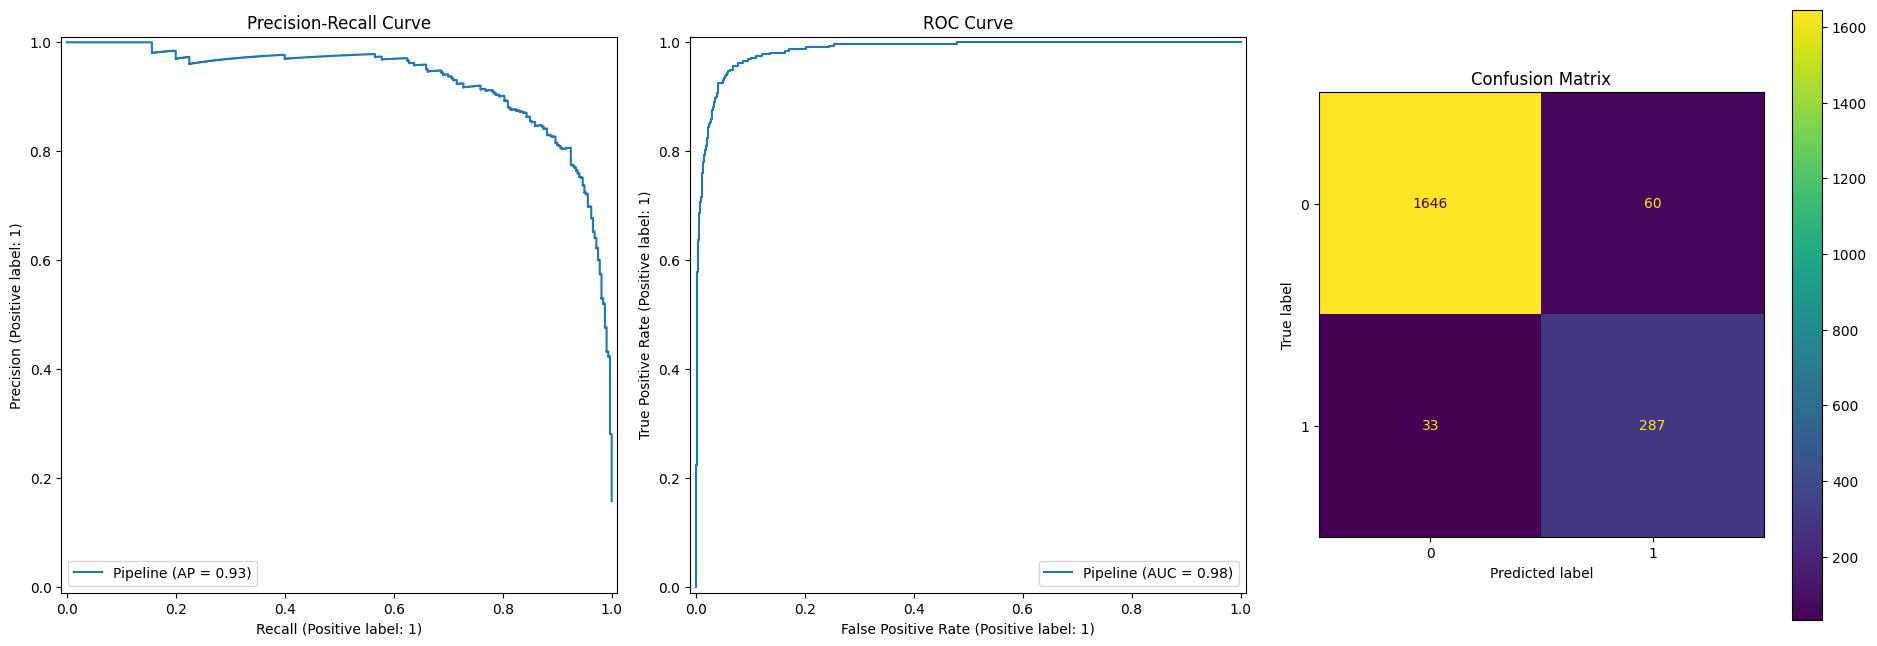

In [ ]:
rf_smote_param_grid = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [5, 10, 15, None],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': ['sqrt', 'log2'],
    'clf__class_weight': [None, 'balanced'],
    'clf__bootstrap': [True]
}

best_rf_smote = smote_train_tune(
    clf=RandomForestClassifier(random_state=42, n_jobs=-1),
    X_train=X_train_preprocessed,
    X_test=X_test_preprocessed,
    y_train=y_train,
    y_test=y_test,
    param_grid=rf_smote_param_grid,
    cv=5
)

# **8.4 Gradient Boosting**

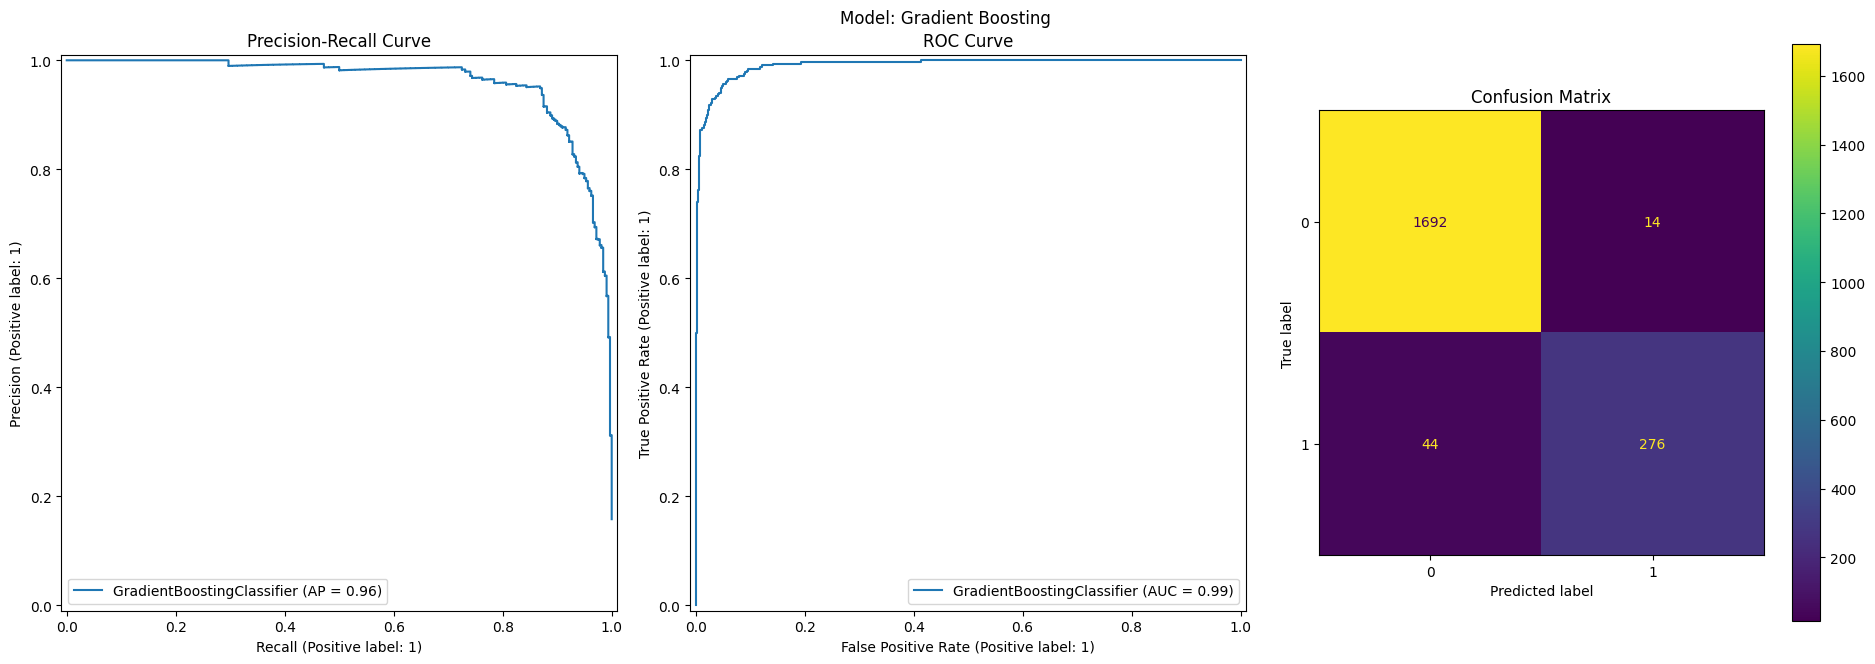


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1706
           1       0.95      0.86      0.90       320

    accuracy                           0.97      2026
   macro avg       0.96      0.93      0.94      2026
weighted avg       0.97      0.97      0.97      2026

ROC-AUC Score: 0.99
Recall: 0.86
Accuracy: 0.97

Starting Grid Search CV... ... ...
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 1.0}
Best CV recall: 0.88
Optimized Accuracy: 0.98

Classification Report (Optimized Model):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1706
           1       0.95      0.89      0.92       320

    accuracy                           0.98      2026
   macro avg       0.97      0.94      0.95      2026
weighted avg       0.98      0

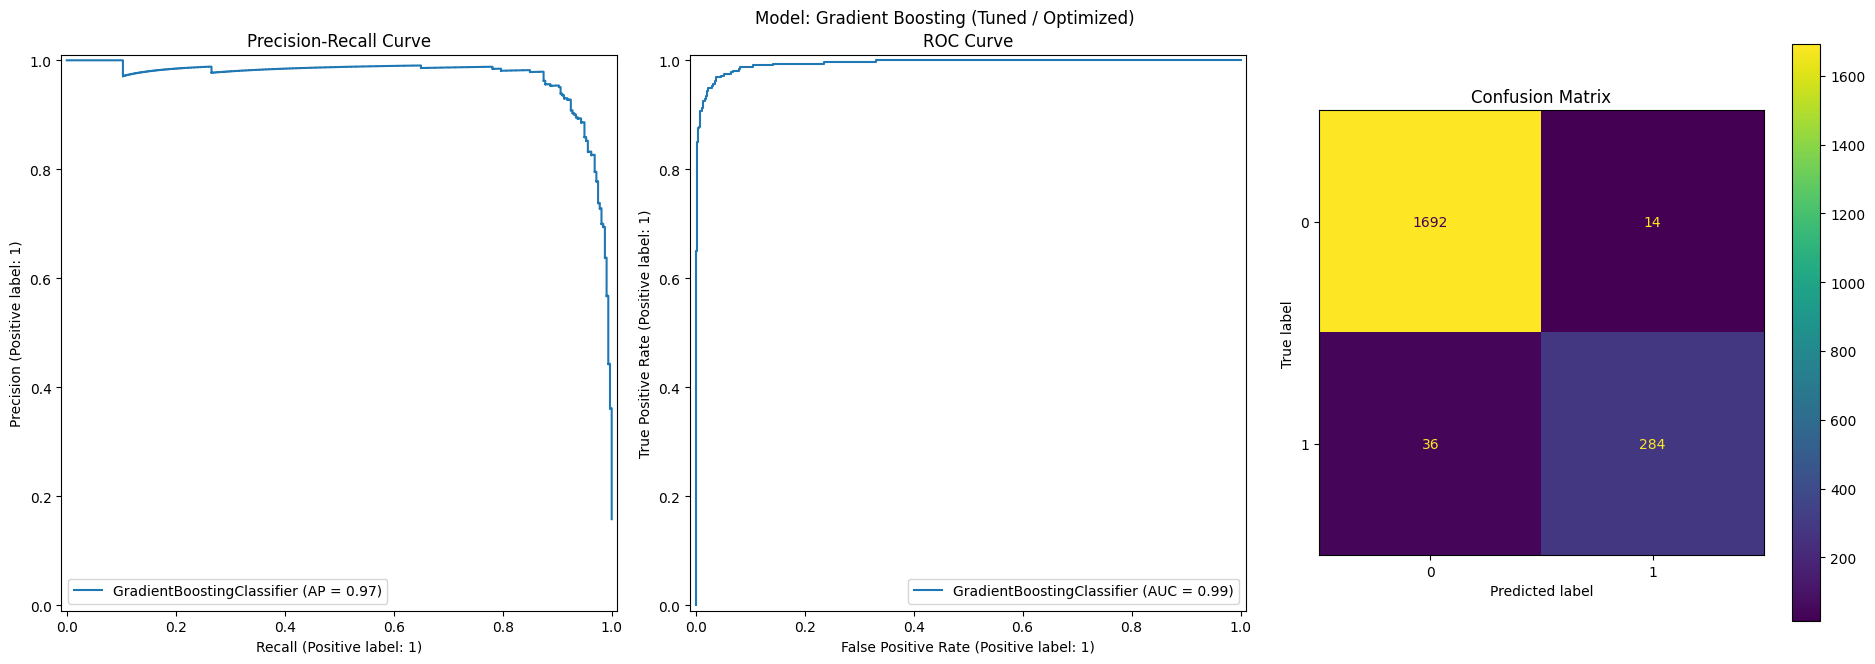

In [ ]:
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],  # Shrinks contribution of each tree
    'max_depth': [3, 5],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4],
    'subsample': [0.8, 1.0], # Fraction of samples for each tree
    'max_features': ['sqrt', None]
}

best_gb = train_and_tune(
    clf=GradientBoostingClassifier(random_state=42),
    model_name="Gradient Boosting",
    X_train=X_train_preprocessed,
    y_train=y_train,
    X_test=X_test_preprocessed,
    y_test=y_test,
    param_grid=gb_param_grid,
    cv=5
)

# **SMOTE + Gradient Boosting**

Original class distribution:
churn
0    6794
1    1307
Name: count, dtype: int64

After SMOTE:
churn
0    6794
1    6794
Name: count, dtype: int64
Best Parameters: {'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__max_features': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 10, 'clf__n_estimators': 200, 'clf__subsample': 0.8}

Best CV Recall: 0.91
Test Accuracy: 0.97

ROC-AUC Score: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1706
           1       0.90      0.94      0.92       320

    accuracy                           0.97      2026
   macro avg       0.94      0.96      0.95      2026
weighted avg       0.97      0.97      0.97      2026



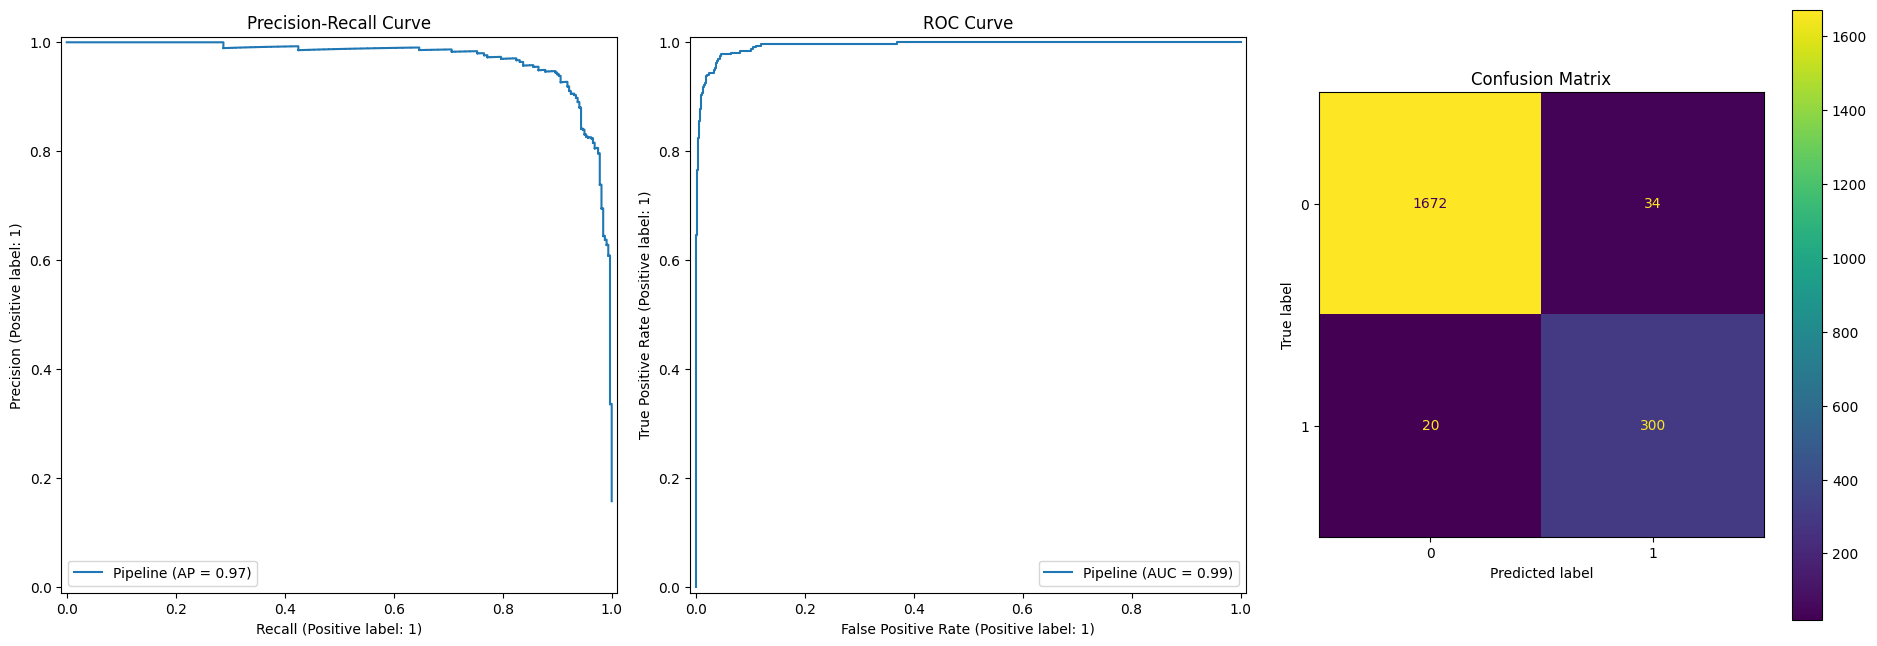

In [ ]:
gb_smote_param_grid = {
    'clf__n_estimators': [200, 250],
    'clf__learning_rate': [0.05, 0.1],
    'clf__max_depth': [3, 5],
    'clf__min_samples_split': [2, 10],
    'clf__min_samples_leaf': [1, 4],
    'clf__subsample': [0.8, 1.0],
    'clf__max_features': ['sqrt', None],
}

best_gb_smote = smote_train_tune(
    clf=GradientBoostingClassifier(random_state=42),
    X_train=X_train_preprocessed,
    X_test=X_test_preprocessed,
    y_train=y_train,
    y_test=y_test,
    param_grid=gb_smote_param_grid,
    cv=3
)

# **8.5 XGBoost**

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

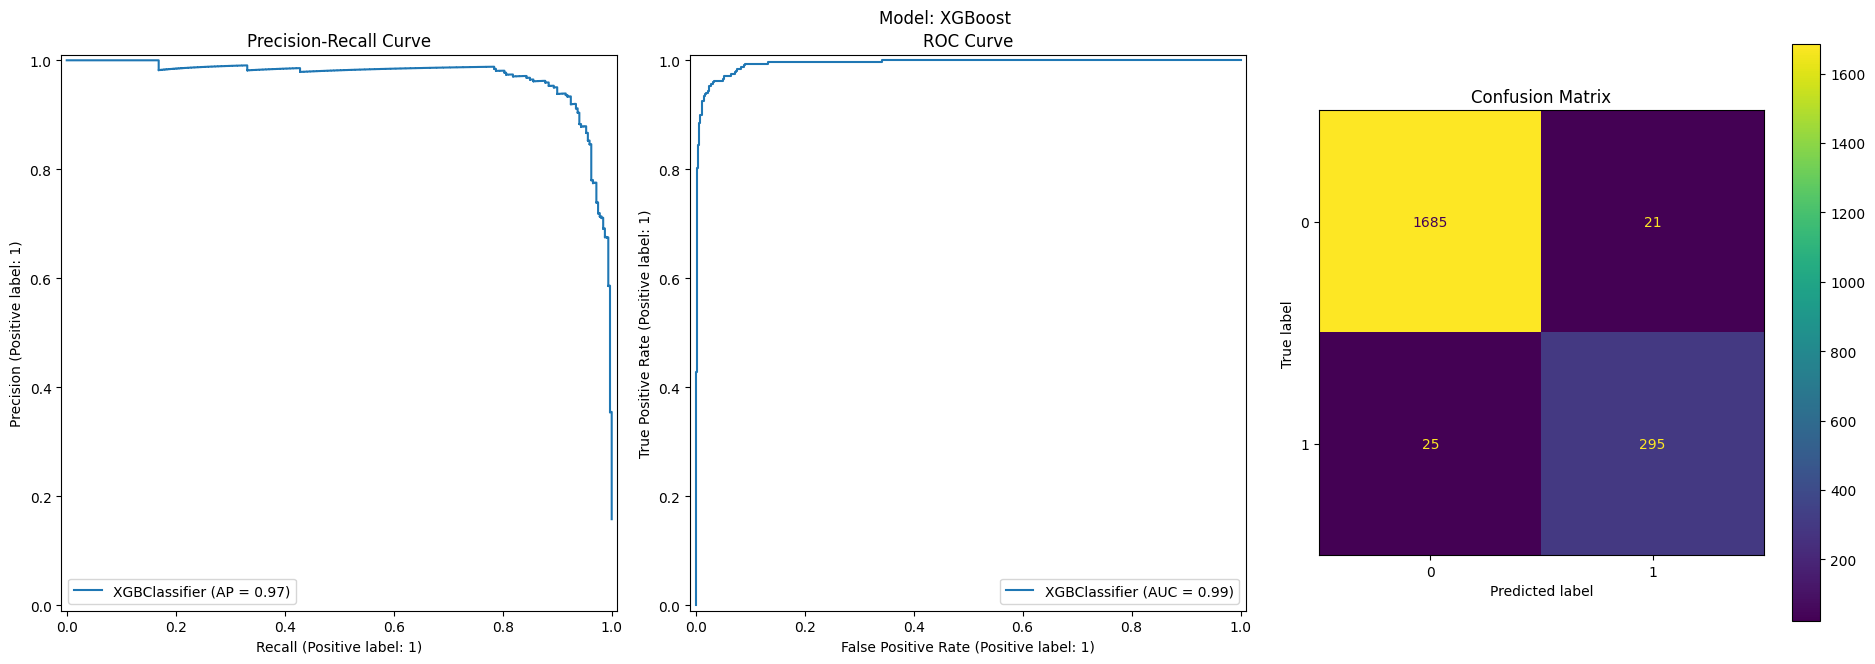


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1706
           1       0.93      0.92      0.93       320

    accuracy                           0.98      2026
   macro avg       0.96      0.95      0.96      2026
weighted avg       0.98      0.98      0.98      2026

ROC-AUC Score: 0.99
Recall: 0.92
Accuracy: 0.98

Starting Grid Search CV... ... ...
Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'reg_alpha': 0, 'subsample': 0.8}
Best CV recall: 0.89
Optimized Accuracy: 0.98

Classification Report (Optimized Model):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1706
           1       0.94      0.93      0.93       320

    accuracy                           0.98      2026
   macro avg       0.96      0.96      0.96      2026
weighted avg       0.98

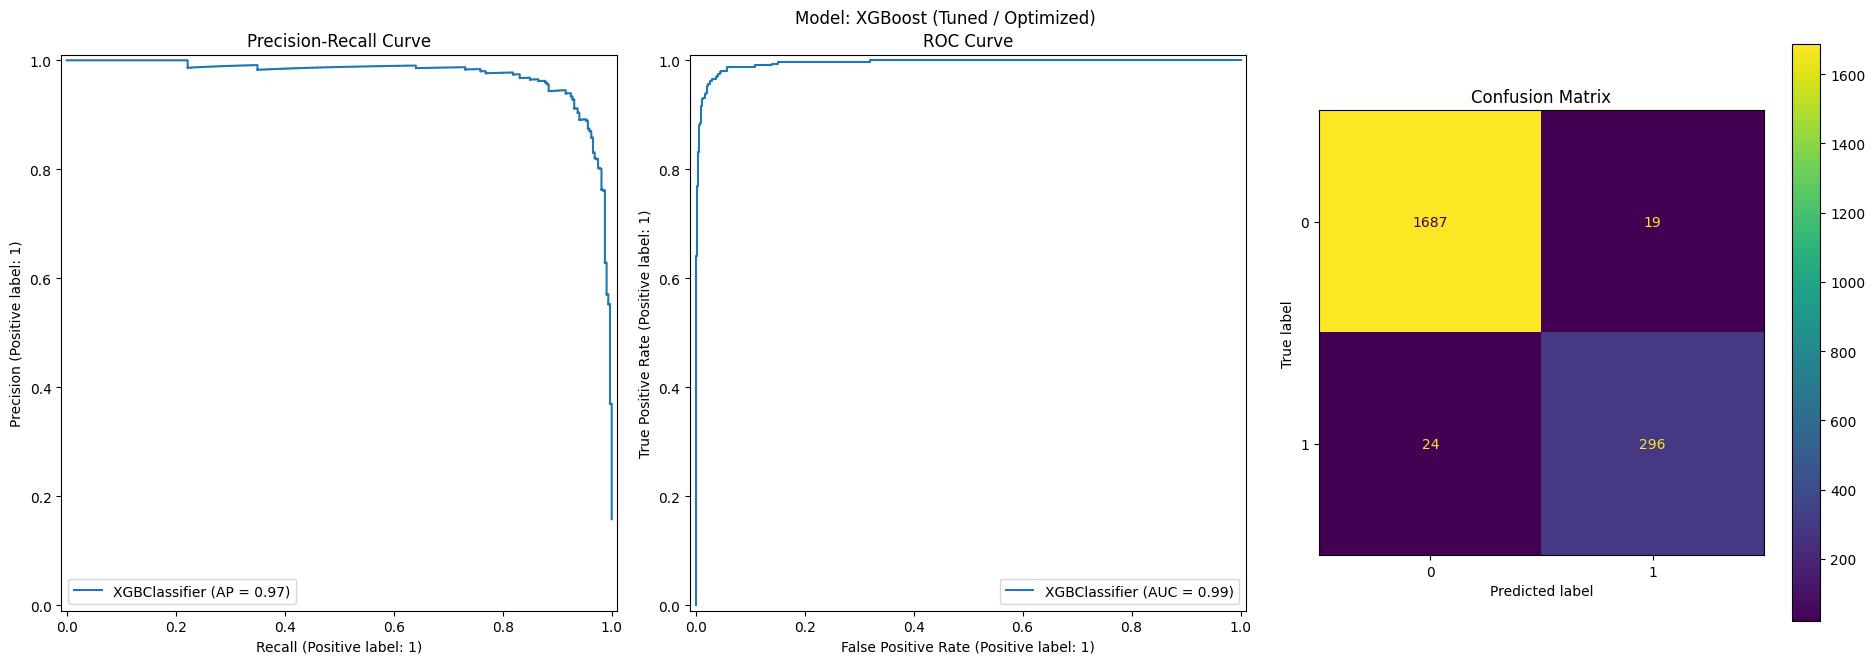

In [ ]:
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],        # Row sampling
    'colsample_bytree': [0.7, 1.0], # Feature sampling
    'gamma': [0, 1],   # Minimum loss reduction for split
    'min_child_weight': [1, 5],
    'reg_alpha': [0, 0.1], # L1 regularization
}

best_xgb = train_and_tune(
    clf=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1),
    model_name="XGBoost",                 # use_label_encoder=False disables deprecated internal label encoding.
    X_train=X_train_preprocessed,         # eval_metric='logloss' is needed to avoid additional warnings.
    y_train=y_train,
    X_test=X_test_preprocessed,
    y_test=y_test,
    param_grid=xgb_param_grid,
    cv=3
)

Original class distribution:
churn
0    6794
1    1307
Name: count, dtype: int64

After SMOTE:
churn
0    6794
1    6794
Name: count, dtype: int64
Best Parameters: {'clf__colsample_bytree': 0.7, 'clf__gamma': 0.2, 'clf__learning_rate': 0.05, 'clf__max_depth': 4, 'clf__min_child_weight': 8, 'clf__n_estimators': 200, 'clf__reg_alpha': 0.5, 'clf__reg_lambda': 3, 'clf__scale_pos_weight': 3, 'clf__subsample': 0.8}
Test Accuracy: 0.95

ROC-AUC Score: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1706
           1       0.76      0.96      0.85       320

    accuracy                           0.95      2026
   macro avg       0.88      0.95      0.91      2026
weighted avg       0.96      0.95      0.95      2026



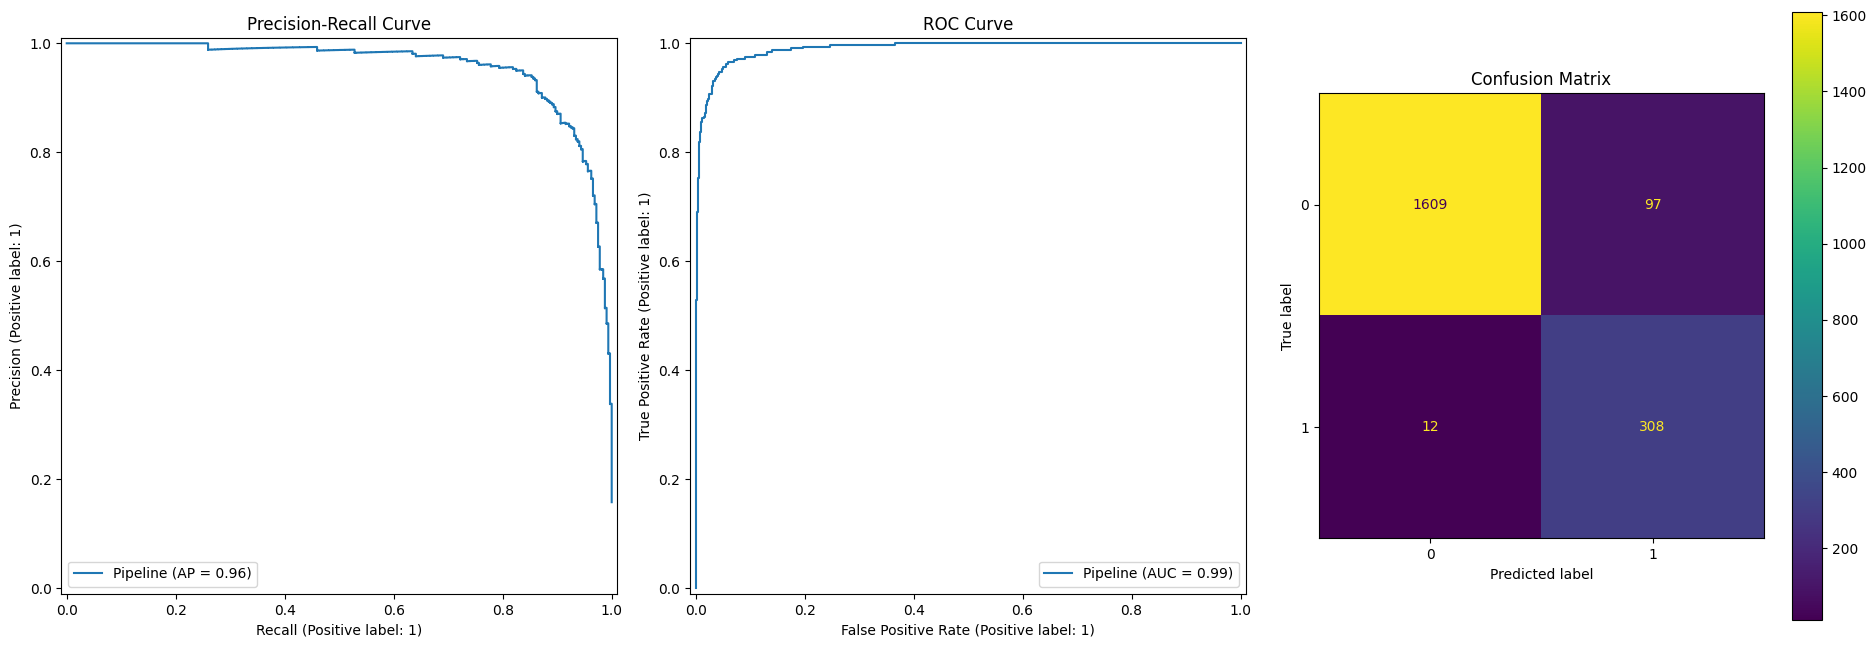

In [ ]:
xgb_smote_param_grid = {
    'clf__n_estimators': [200, 250],
    'clf__max_depth': [4, 5, 6],
    'clf__learning_rate': [0.05, 0.08],
    'clf__subsample': [0.8, 0.9],
    'clf__colsample_bytree': [0.7, 0.8],
    'clf__scale_pos_weight': [1, 2, 3],
    'clf__min_child_weight': [3, 5, 8],
    'clf__reg_alpha': [0.5, 1.0],
    'clf__reg_lambda': [3, 4.0],
    'clf__gamma': [0.1, 0.2]
}

best_xgb_smote = smote_train_tune(
    clf=xgb.XGBClassifier(
        random_state=42,
        tree_method='gpu_hist',       # GPU
        predictor='gpu_predictor',    # GPU
        device='cuda',                # GPU
        eval_metric='aucpr',        # Good for imbalanced data
        use_label_encoder=False,
        n_jobs=1
    ),
    X_train=X_train_preprocessed,
    X_test=X_test_preprocessed,
    y_train=y_train,
    y_test=y_test,
    param_grid=xgb_smote_param_grid,
    cv=3
)

# **9. Model Selection :**

I have finalized the **`SMOTE` + `XGBoost model`** (`best_xgb_smote_fast`) as the final model.

## **Model Test Performance Summary :**

 Final **XGBoost + SMOTE** model achieved:
 - **Accuracy: 95%**
 - **Recall: 96% (for churn class)**

# **10. Real-World Business Cost Framework:**

The final **XGBoost + SMOTE** model is a valuable tool that can help the bank make more money. By spotting customers who are likely to leave, the bank can take action early instead of reacting later. Here’s a breakdown of the model's potential value, based on its performance on the test set of **2,026** customers.

### **(A) Financial Assumptions:**

To quantify the model's impact, we'll use the following conservative business assumptions. These can be adjusted based on the bank's internal figures.

- **Customer Lifetime Value (CLV):** The average profit a retained customer represents over the next *two* years. Let's estimate this at **$800**.

- **Cost of Retention Offer:** The cost of a personalized incentive (e.g., cashback offer, fee waiver) sent to an at-risk customer. Let's set this at **$50**.

- **Retention Success Rate:** The percentage of targeted at-risk customers who accept the offer and are successfully retained. We'll assume a **30%** success rate.

### **(B) Performance on the Test Set (2,026 Customers):**

From classification report, we know the model made the following decisions on the 320 customers who would have actually churned:

- **True Positives (Customers Correctly Identified as At-Risk):** **307**

 *(Calculation: 320 actual churners × 96% recall)*

- **False Negatives (Customers Missed by the Model):** **13**

 *(Calculation: 320 - 307)*

- **False Positives (Loyal Customers Incorrectly Flagged):** **97**


## **(C) Financial Impact Calculation:**

We can now calculate the net financial gain.

### **1. Value Retained (Benefit):**

The model correctly identified 307 at-risk customers. By extending an offer, we successfully retain 30% of them.

- `307 customers` × `30% success rate` × `$800 CLV` = **$73,680 in retained value.**

### **2. Cost of Intervention (Investment):**

The bank sends offers to everyone the model flags, which includes the **307 True Positives** and the **97 False Positives**.

- `(307 + 97) customers` × `$50 cost/offer` = **$20,200 in intervention costs.**

### **3. Net Financial Gain:**


This is the value retained minus the cost of the retention campaign.
- `$73,680 (Value Retained)` - `$20,200 (Cost of Intervention)` = **$53,480 Net Gain.**

### **4. Calculation of Savings Per Customer:**

**--- Average Savings Across the Entire Test Set:**
This shows the overall value your model adds for every customer it analyzes.

- **Formula:** `Total Net Savings` / `Total Customers in Test Set`
- **Calculation:** `$53,480` / `2,026` = **$26.40 per customer**

**So,** *Our model is projected to generate a net savings of over **\$53,000 for this test group** alone. This is achieved with high efficiency, translating to an average value of **\$26.40 for every customer** we analyze.*